# 1 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 2 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
    * 분석을 통해 가설을 검정해 봅니다.

# 3 라이브러리 로드

In [2]:
# 분석에 사용할 pandas, 수치 계산에 사용할 numpy, 시각화에 사용할 seaborn을 불러옵니다.
# 또 구버전의 주피터 노트북에서는 %matplotlib inline 설저을 되어야 노트북 안에서 그래프를 시각화 합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

4 한글폰트 설정

In [3]:
import os

plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format= 'retina'

In [5]:
# 다운로드 받은 파일을 판다스의 read_csv를 통해 읽어옵니다.
# 파일을 읽어온 후 shape로 행과 열의 수를 출력합니다,
df= pd.read_csv("../data/국민건강보험공단_건강검진정보_20211229.csv", encoding="cp949")
df.shape

(1000000, 31)

# 5.1 데이터 미리보기

In [6]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.head()

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0  2020         1    36     1             9        165          60  72.1   
1  2020         2    27     2            13        150          65  81.0   
2  2020         3    11     2            12        155          55  70.0   
3  2020         4    31     1            13        160          70  90.8   
4  2020         5    41     2            12        155          50  75.2   

   시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  흡연상태  음주여부  \
0    1.2    1.5  ...      1.1        21.0        27.0    21.0   1.0   0.0   
1    0.8    0.8  ...      0.5        18.0        15.0    15.0   1.0   0.0   
2    0.6    0.7  ...      0.7        27.0        25.0     7.0   1.0   0.0   
3    1.0    1.0  ...      1.2        65.0        97.0    72.0   1.0   0.0   
4    1.5    1.2  ...      0.7        18.0        17.0    14.0   1.0   0.0   

   구강검진 수검여부  치아우식증유무   치석    데이터 공개일자  
0          0      NaN  NaN  2021-12-29  
1          0      NaN  NaN  2021-12-29  
2          0      NaN  NaN  2021-12-29  
3          1      0.0  0.0  2021-12-29  
4          0      NaN  NaN  2021-12-29  

[5 rows x 31 columns]

In [7]:
df.tail()

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
999995  2020    999996    41     2            13        145          55  81.0   
999996  2020    999997    26     2            12        160          55  76.5   
999997  2020    999998    48     1             9        175          70  85.0   
999998  2020    999999    48     2             9        160          70  91.0   
999999  2020   1000000    28     1            11        160          55  76.1   

        시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  흡연상태  \
999995    0.9    1.0  ...      0.6        21.0        25.0    18.0   1.0   
999996    1.5    1.5  ...      0.8        21.0        14.0    19.0   1.0   
999997    1.2    1.2  ...      0.9        26.0        20.0    17.0   1.0   
999998    0.6    0.5  ...      1.0        25.0        29.0    13.0   1.0   
999999    2.0    2.0  ...      0.9        17.0        13.0    24.0   2.0   

        음주여부  구강검진 수검여부  치아우식증유무  치석    데이터 공개일자  
999995   0.0          0      NaN NaN  2021-12-29  
999996   1.0          0      NaN NaN  2021-12-29  
999997   1.0          0      NaN NaN  2021-12-29  
999998   0.0          0      NaN NaN  2021-12-29  
999999   0.0          0      NaN NaN  2021-12-29  

[5 rows x 31 columns]

In [8]:
df.sample(5)

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
642404  2020    642405    26     2            14        150          60  87.0   
421652  2020    421653    43     2            12        155          50  65.0   
717281  2020    717282    11     1            11        160          65  91.0   
667163  2020    667164    30     2            14        150          50  80.0   
290708  2020    290709    26     1             9        180          90  91.0   

        시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  흡연상태  \
642404    1.2    1.2  ...      0.5        28.0        23.0    16.0   1.0   
421652    0.7    0.7  ...      0.8        27.0        21.0    16.0   1.0   
717281    0.8    1.2  ...      1.1        26.0        27.0    47.0   2.0   
667163    0.7    0.9  ...      0.7        17.0        15.0    13.0   1.0   
290708    1.0    1.0  ...      0.9        43.0        51.0    34.0   3.0   

        음주여부  구강검진 수검여부  치아우식증유무   치석    데이터 공개일자  
642404   0.0          1      0.0  0.0  2021-12-29  
421652   0.0          1      0.0  2.0  2021-12-29  
717281   1.0          1      1.0  1.0  2021-12-29  
667163   0.0          0      NaN  NaN  2021-12-29  
290708   1.0          0      NaN  NaN  2021-12-29  

[5 rows x 31 columns]

# 6 기본정보 보기

In [9]:
# info를 통해 데이터의 크기 형식, 메모리 사용량 등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [10]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [11]:
# dtypes를 통해 데이터 형식만 출력합니다.
df.dtypes

기준년도              int64
가입자 일련번호          int64
시도코드              int64
성별코드              int64
연령대 코드(5세단위)      int64
신장(5Cm단위)         int64
체중(5Kg 단위)        int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기 혈압          float64
이완기 혈압          float64
식전혈당(공복혈당)      float64
총 콜레스테롤         float64
트리글리세라이드        float64
HDL 콜레스테롤       float64
LDL 콜레스테롤       float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마 지티피          float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
치석              float64
데이터 공개일자         object
dtype: object

# 7 결측치 보기

In [12]:
True + True +False

2

In [13]:
# isnull을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼머다의 결측치 수를 세어줍니다.
df.isnull().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

In [14]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계할 수 있습니다.
df.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

<AxesSubplot:>

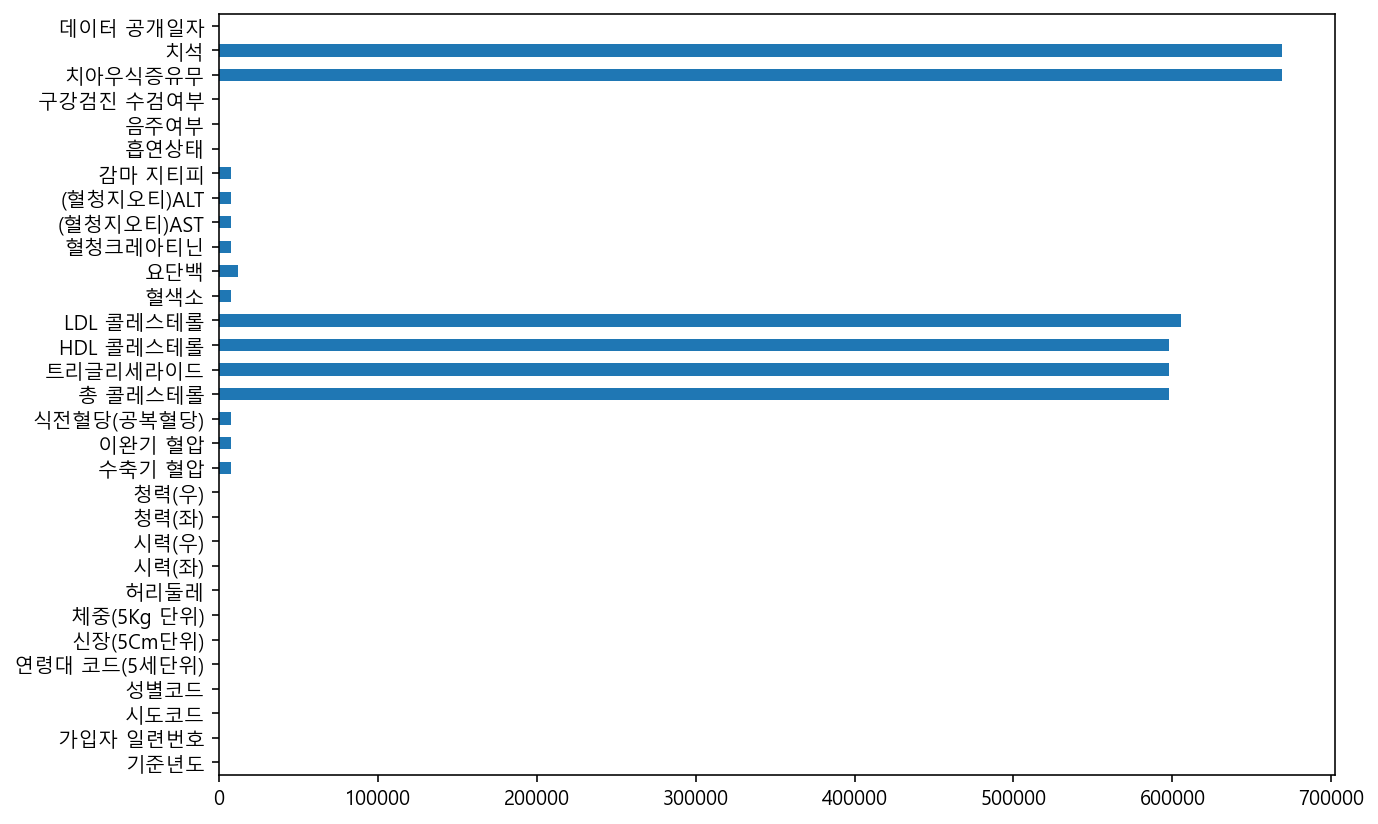

In [15]:
# 판다스에 내장 된 plot 을 통해 시각화 합니다.
df.isnull().sum().plot.barh(figsize=(10,7))

# 8 일부 데이터 요약하기

In [16]:
# 여러 컬럼을 가져옵니다.
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기 합니다.
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        27.0        21.0
1        15.0        18.0
2        25.0        27.0
3        97.0        65.0
4        17.0        18.0

In [17]:
# "(혈청지오티)ALT, ""(혈청지오티)AST" 를 요약합니다.
# df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  992398.000000  992399.000000
mean       26.759641      27.698337
std        25.835091      25.286659
min         1.000000       1.000000
25%        16.000000      20.000000
50%        21.000000      24.000000
75%        31.000000      30.000000
max      5990.000000    8712.000000

# 9 value_counts 로 값 집계하기

In [18]:
# value_counts 를 통해 성별코드로 그룹화 하고 갯수를 집계합니다.
df['성별코드'].value_counts()

1    510689
2    489311
Name: 성별코드, dtype: int64

In [19]:
# value_counts 를 통해 흡연상태로 그룹화 하고 갯수를 집계합니다.
df['흡연상태'].value_counts()

1.0    626138
2.0    189808
3.0    183711
Name: 흡연상태, dtype: int64

# 10 groupby 와 pivot_table 사용하기

#### 10.1 groupby

In [20]:
# groupby를 통해 데이터를 그룹화 합니다.
# 성별코드로 그룹화 한 데이터를 세어 봅니다.
df.groupby(['성별코드'])['가입자 일련번호'].count()


성별코드
1    510689
2    489311
Name: 가입자 일련번호, dtype: int64

In [21]:
# 성별 코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
df.groupby(['성별코드', '음주여부'])['가입자 일련번호'].count()

성별코드  음주여부
1     0.0     131844
      1.0     378767
2     0.0     283275
      1.0     205918
Name: 가입자 일련번호, dtype: int64

In [22]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구합니다.
df.groupby(['성별코드', '음주여부'])['감마 지티피'].mean()

성별코드  음주여부
1     0.0     34.212195
      1.0     55.059597
2     0.0     24.177603
      1.0     26.728777
Name: 감마 지티피, dtype: float64

In [23]:
#성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다.
df.groupby(['성별코드', '음주여부'])['감마 지티피'].describe()

count       mean        std  min   25%   50%   75%     max
성별코드 음주여부                                                               
1    0.0   130103.0  34.212195  38.533470  1.0  18.0  25.0  37.0  1731.0
     1.0   377769.0  55.059597  69.135224  1.0  24.0  36.0  60.0  2630.0
2    0.0   279033.0  24.177603  26.897676  1.0  14.0  18.0  26.0   999.0
     1.0   205296.0  26.728777  36.415153  1.0  14.0  18.0  27.0   999.0

In [24]:
# agg를 사용하면 여러 수치를 함께 구할 수 있습니다.
df.groupby(['성별코드', '음주여부'])['감마 지티피'].agg(['count','mean','median'])

count       mean  median
성별코드 음주여부                           
1    0.0   130103  34.212195    25.0
     1.0   377769  55.059597    36.0
2    0.0   279033  24.177603    18.0
     1.0   205296  26.728777    18.0

#### 10.2 pivot_table

In [25]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다.
df.pivot_table(index="성별코드", values="가입자 일련번호", aggfunc="count")

가입자 일련번호
성별코드          
1       510689
2       489311

In [26]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
pd.pivot_table(df, index="음주여부", values="감마 지티피")

감마 지티피
음주여부           
0.0   27.368548
1.0   45.084373

In [27]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정해 줄 수도 있습니다.
pd.pivot_table(df, index="음주여부", values="감마 지티피" , aggfunc=["mean", "median"])

mean median
         감마 지티피 감마 지티피
음주여부                  
0.0   27.368548   20.0
1.0   45.084373   28.0

In [28]:
# aggfunc에 여러 값을 한번에 지정할 수도 있습니다
pd.pivot_table(df, index="음주여부", values="감마 지티피" , aggfunc="describe")


25%   50%   75%     count     max       mean  min        std
음주여부                                                               
0.0   15.0  20.0  30.0  409136.0  1731.0  27.368548  1.0  31.423282
1.0   18.0  28.0  48.0  583065.0  2630.0  45.084373  1.0  61.210826

In [29]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구합니다.
pd.pivot_table(df, index=["성별코드",'음주여부'], values="감마 지티피" , aggfunc="describe")

25%   50%   75%     count     max       mean  min        std
성별코드 음주여부                                                               
1    0.0   18.0  25.0  37.0  130103.0  1731.0  34.212195  1.0  38.533470
     1.0   24.0  36.0  60.0  377769.0  2630.0  55.059597  1.0  69.135224
2    0.0   14.0  18.0  26.0  279033.0   999.0  24.177603  1.0  26.897676
     1.0   14.0  18.0  27.0  205296.0   999.0  26.728777  1.0  36.415153

# 11 전체 데이터 시각화 하기
    * 100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는것을 권장합니다.
    * 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.

### 11.1 히스토그램
    * 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진것을 확인할 수 있었습니다.
    * 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화 해서 도수 분포표를 만들고 그 결과를 시각화 합니다.
    * 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다.

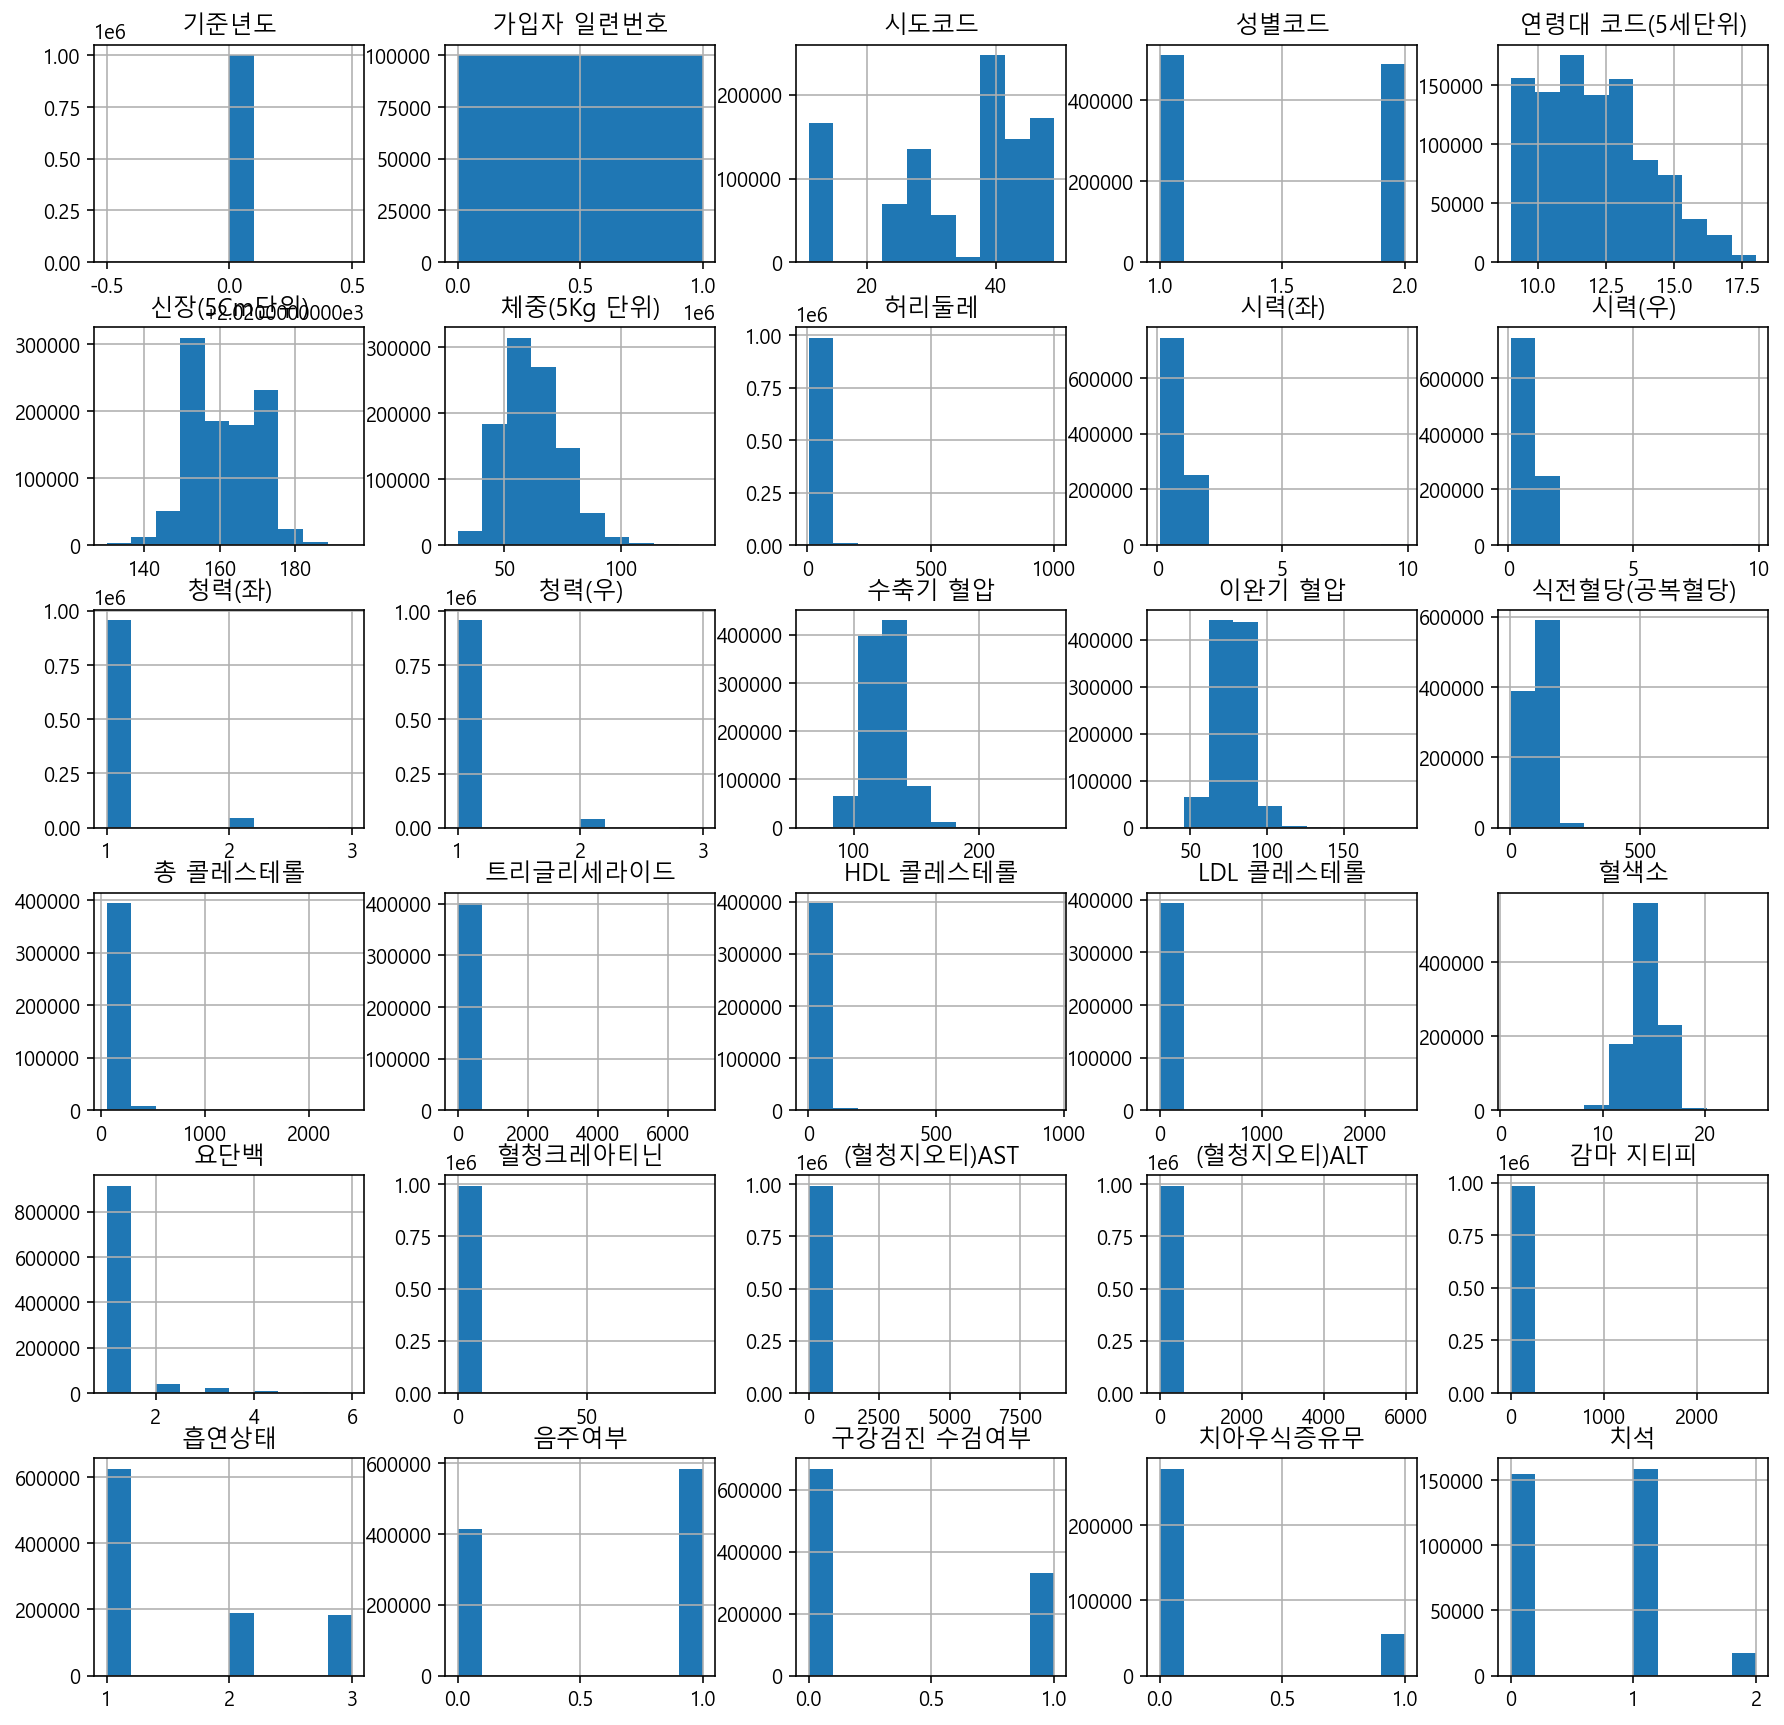

In [30]:
# 전체 데이터에 대한 히스토그램을 출력합니다.
h=df.hist(figsize=(15,15))

### 11.2 슬라이싱을 사용해 히스토그램 그리기
    * 슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
    * 슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다.
    * iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:,:]을 사용합니다.
    * 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)를 지정할 수 있습니다.

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자 일련번호'}>,
        <AxesSubplot:title={'center':'시도코드'}>],
       [<AxesSubplot:title={'center':'성별코드'}>,
        <AxesSubplot:title={'center':'연령대 코드(5세단위)'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg 단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>],
       [<AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>]], dtype=object)

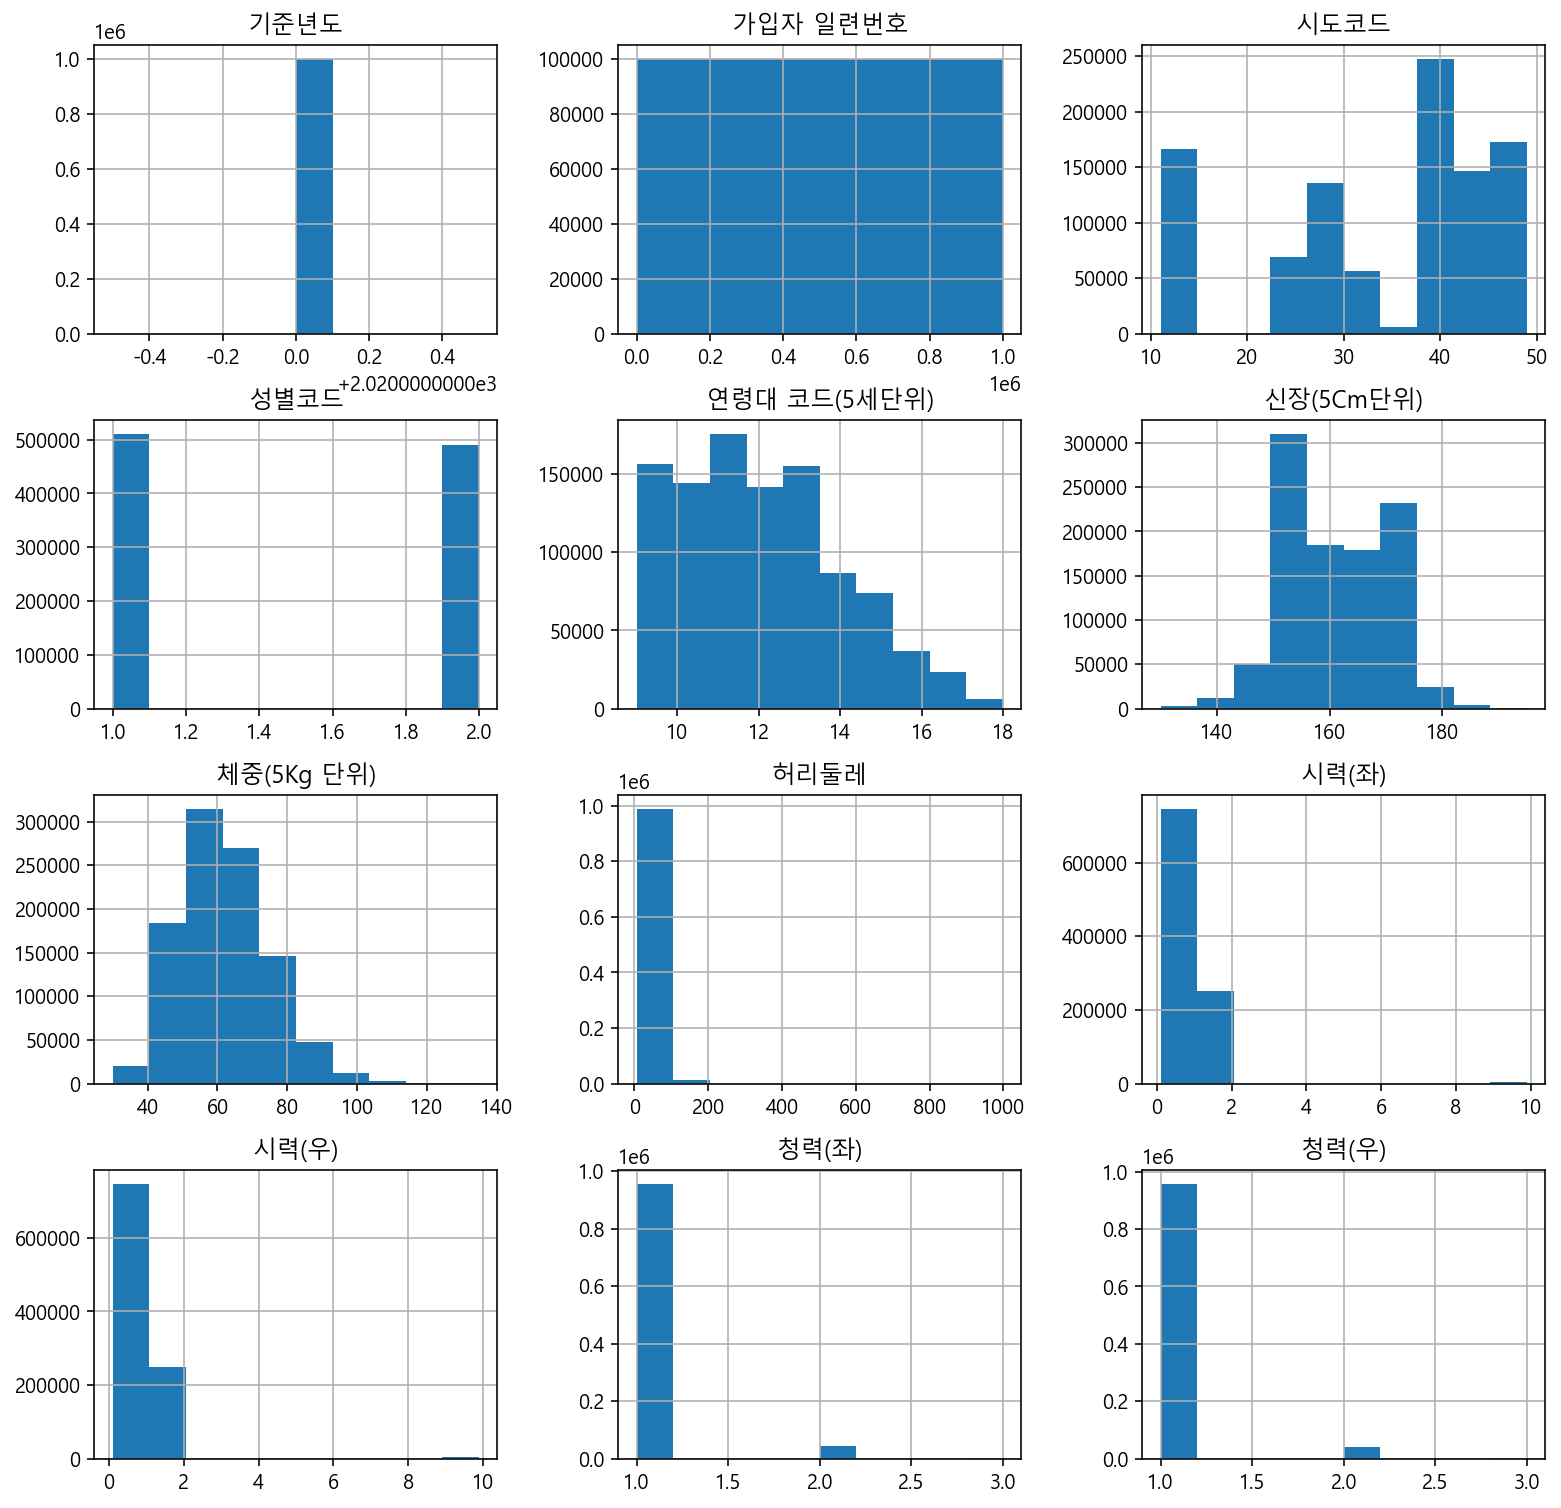

In [31]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그립니다.
# [행, 열]
df.iloc[:,:12].hist(figsize=(13,13))

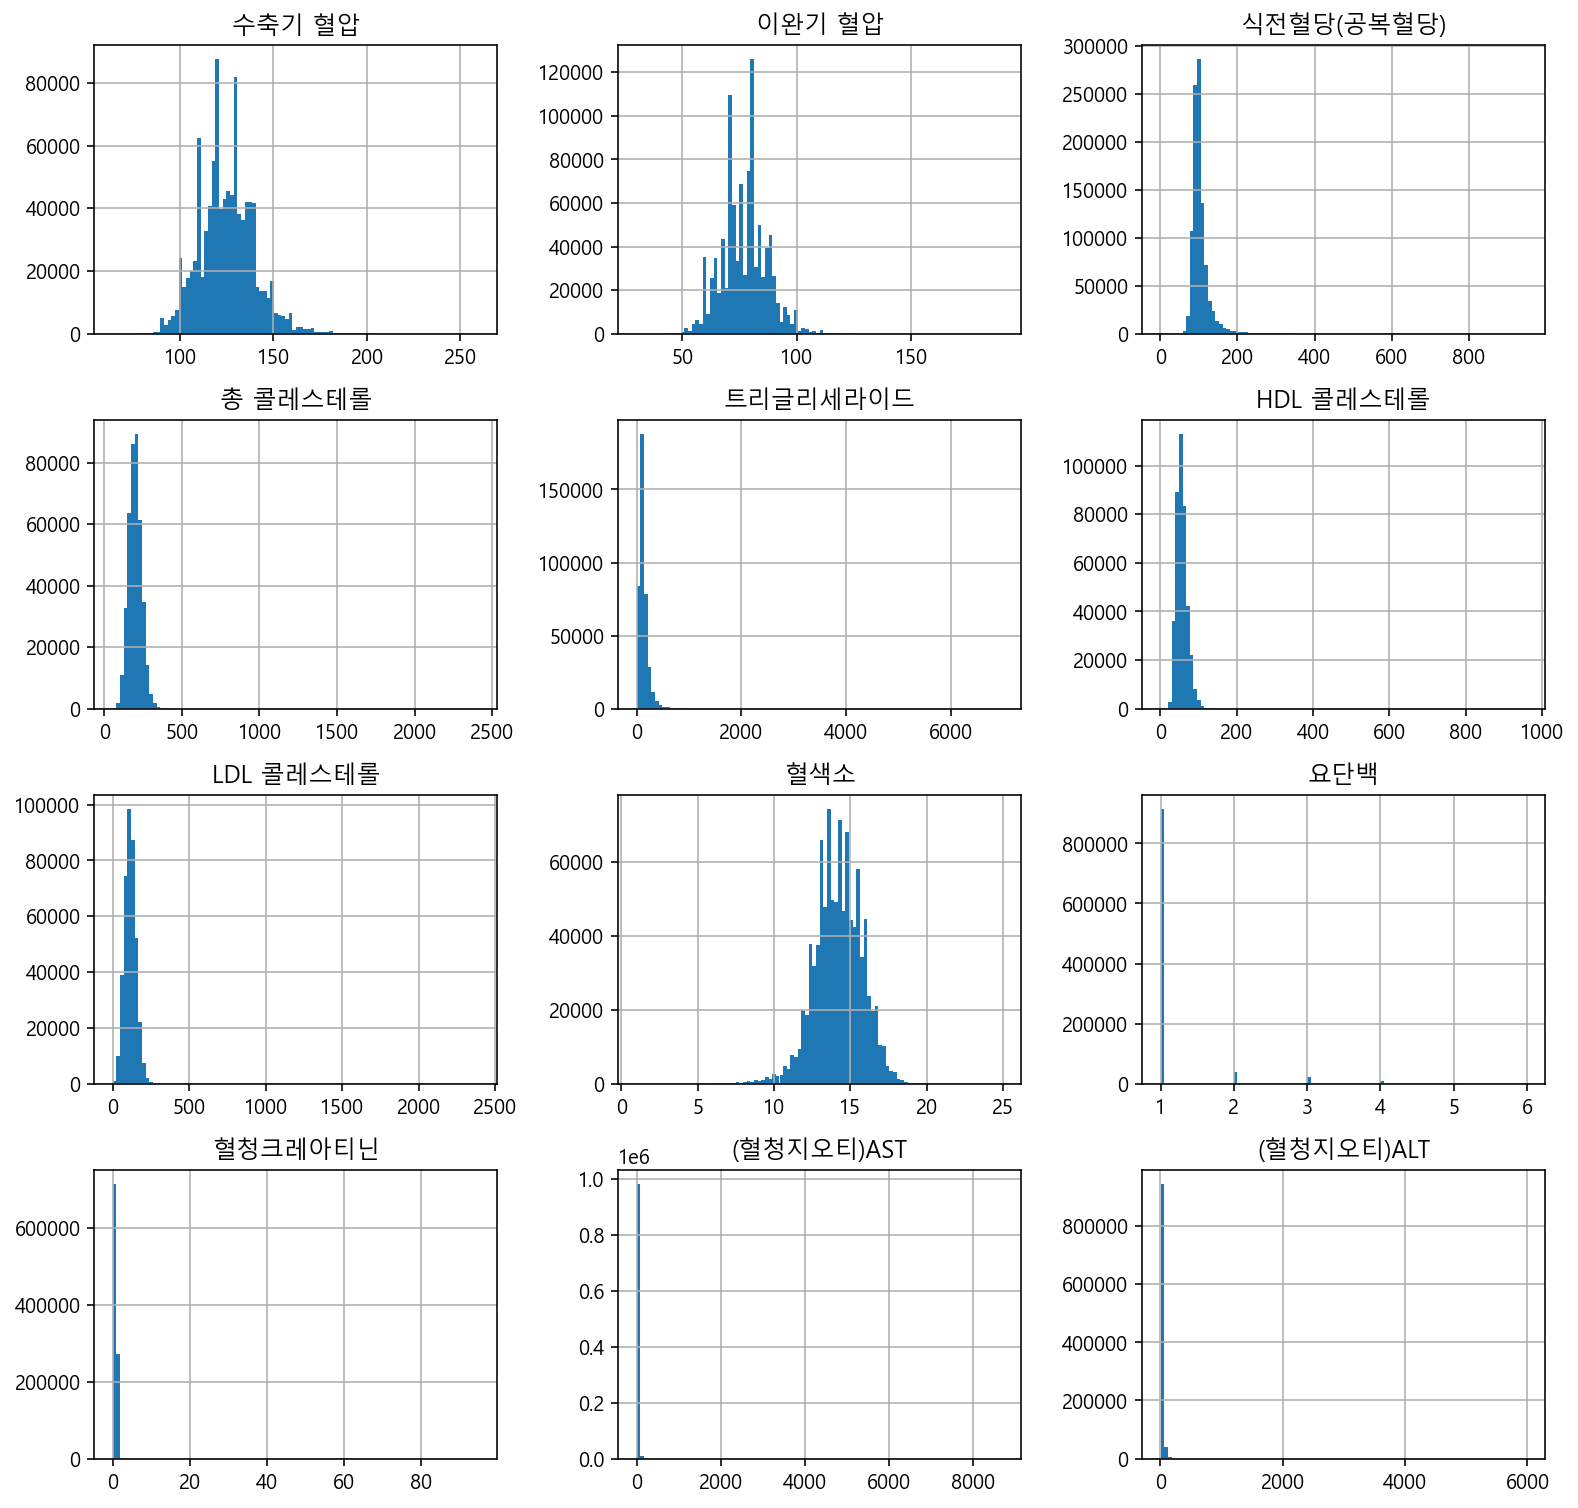

In [32]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지 (12:24) 컬럼에 대한 데이터로 히스토그램을 그립니다.
# bin는 막대의 갯수,  자세하게 볼 수 있음
h=df.iloc[:, 12:24].hist(figsize=(13,13), bins=100)

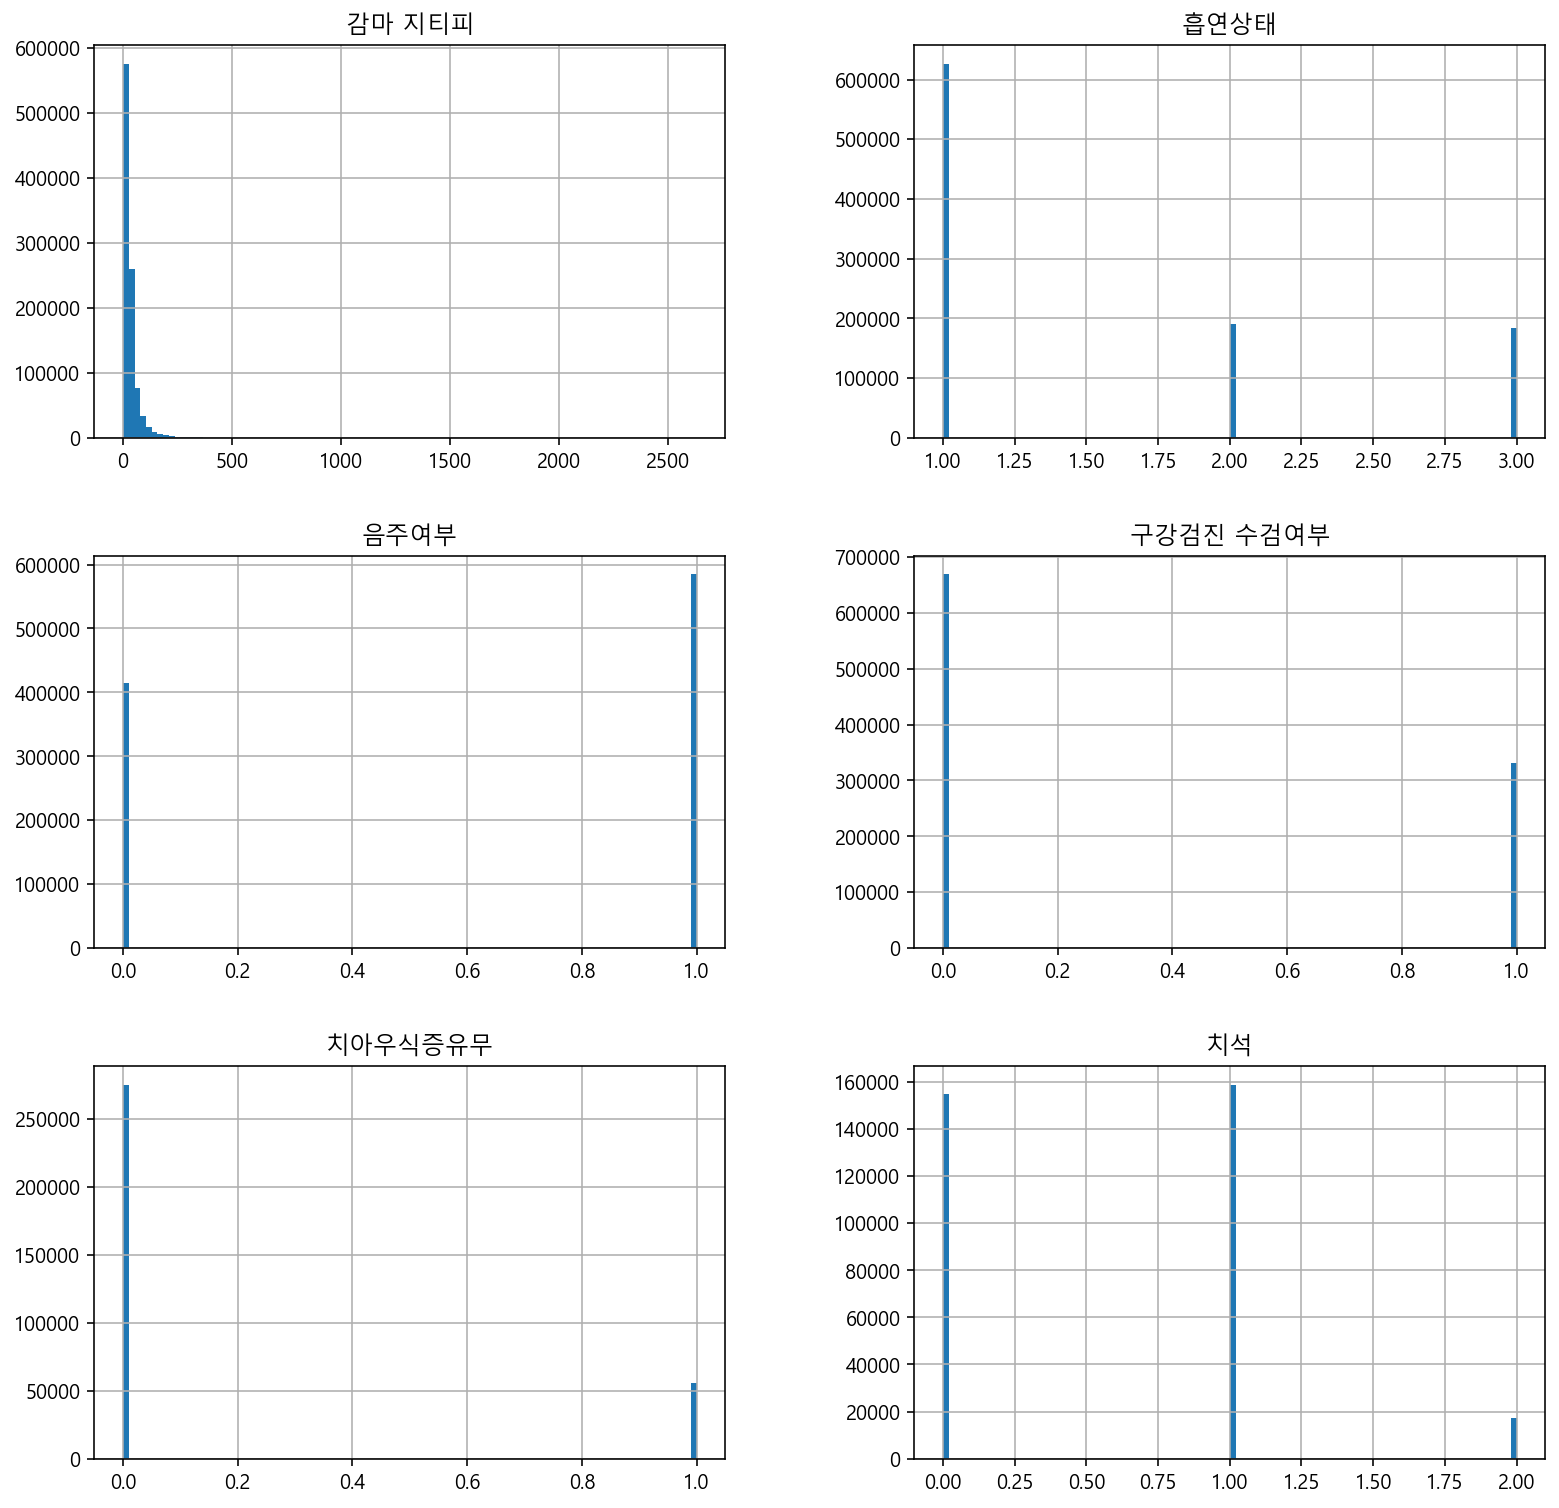

In [33]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지 (24:) 컬럼에 대한 데이터로 히스토그램을 그립니다.
h=df.iloc[:, 24:].hist(figsize=(13,13), bins=100)

# 12 샘플데이터 추출하기
    * seaborn의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도라 오래걸립니다.
    * 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용합니다.

In [34]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출합니다.
# random_state 를 사용해 샘플링되는 값을 고정할 수 있습니다.
# 실험을 통제하기 위해 random_state를 고정하기도 합니다.
# 여기에서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관 없이 값을 고정시키는 역할만 합니다.
df_sample=df.sample(1000, random_state=1)
df_sample.shape

(1000, 31)

# 13 데이터 시각화 도구 Seaborn 사용하기
    * https://seaborn.pydata.org/
    * seaborn 은 https://matplotlib.org/ 을 사용하기 쉽게 만들어 졌으며, 간단하게 고급 통계 연산을 할 수 있습니다.

# 14 범주형(카테고리) 데이터 시각화
    * countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
    * value_counts로 구한 값을 시각화 한다고 보면 됩니다.

### 14.1 countplot - 음주여부

<AxesSubplot:>

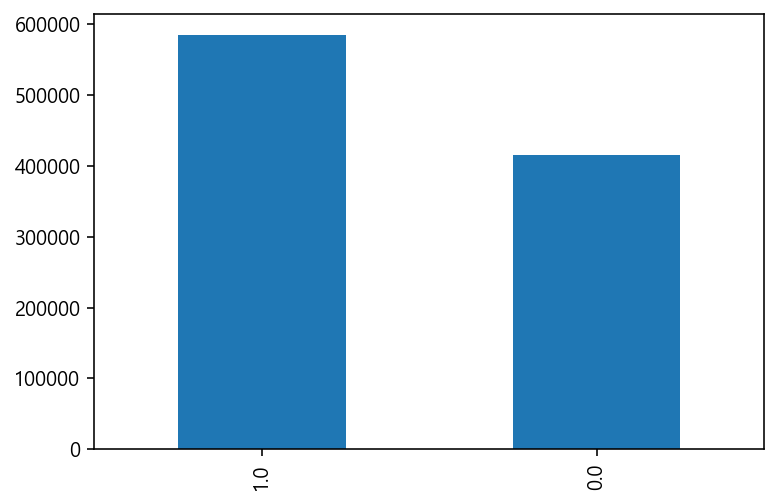

In [35]:
# 음주여부에 따른 countplot을 그립니다.
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

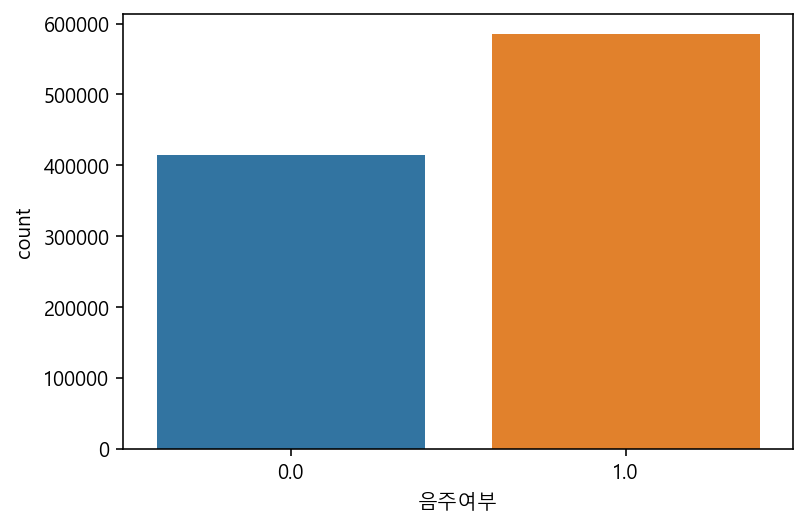

In [36]:
sns.countplot(x="음주여부", data=df)

### 14.2 hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

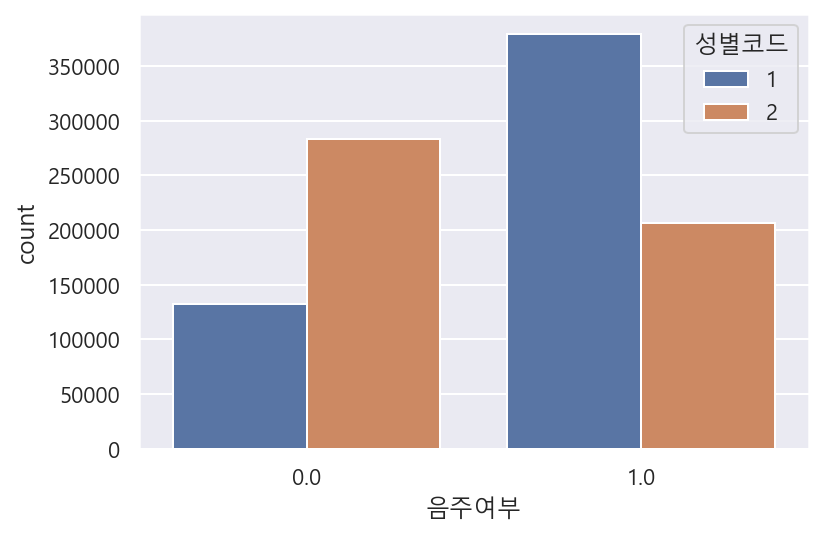

In [37]:
# 음주여부에 따른 countplot을 그리고 hue를 사용해 성별코드로 색상을 구분해 그립니다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 됩니다. 색상을 의미합니다.
# 또, seaborn에서 제공하는 폰트 설정을 사용하실 수도 있습니다.
# 다만, 이 떄 seaborn의 기본 스타일이 적용되는 것을 확인해 주시는 것이 좋습니다.
# Mac
# sns.set(font_scale=1.5, font="AppleGothic")
# Window
sns.set(font_scale=1, font="Malgun Gothic")

sns.countplot(data=df, x="음주여부", hue="성별코드")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='count'>

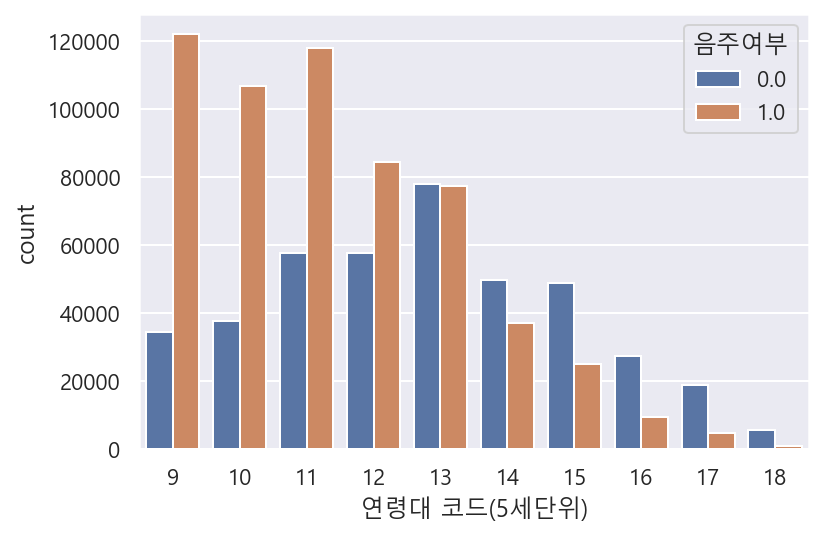

In [39]:
# countplot으로 연령대별 음주여부를 봅니다.
# hue를 사용해 다른 색상으로 표현합니다.
sns.countplot(data=df, x="연령대 코드(5세단위)", hue="음주여부")

### 14.3 countplot - 키와 몸무게
    * 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
    * 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다.
    * 이렇게 특정 범위로 묶게 되면 연ㅅ독형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

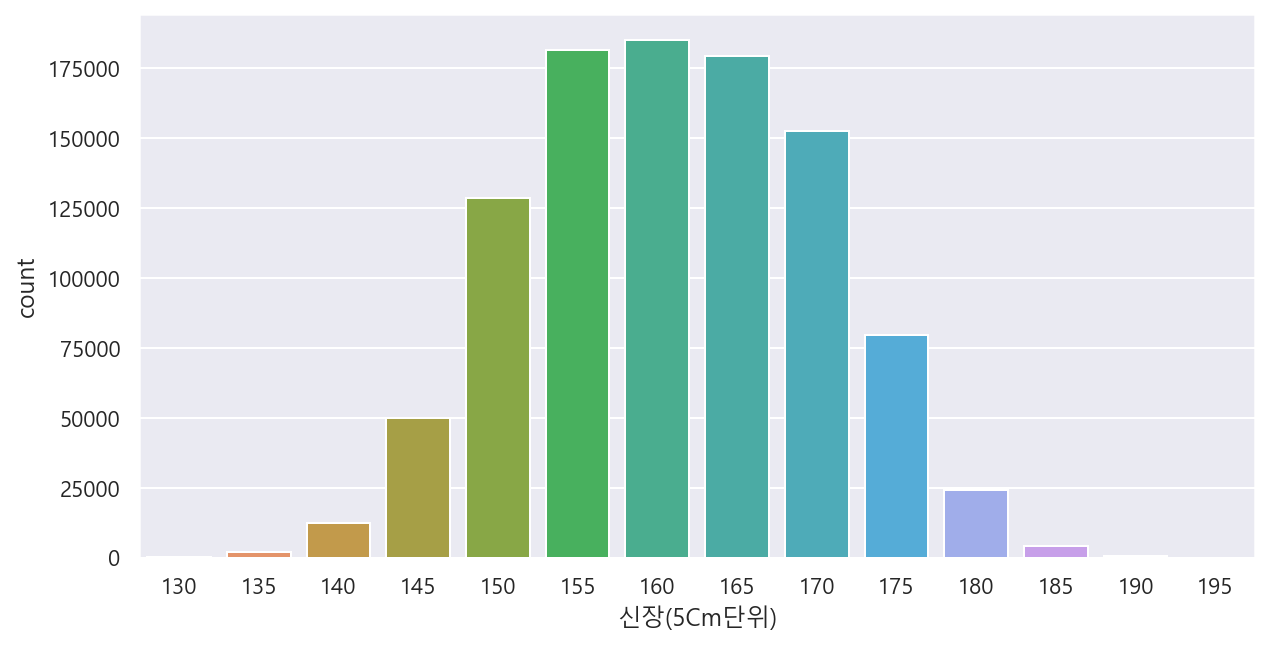

In [40]:
# countplot으로 키를 봅니다.
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

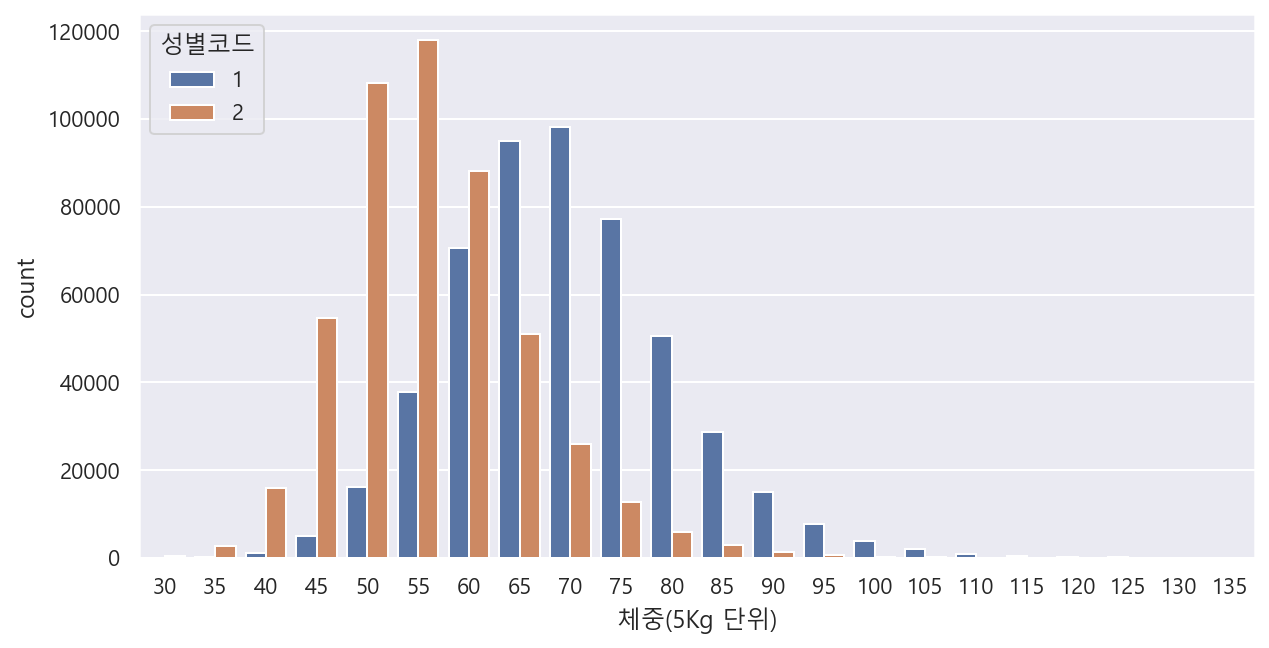

In [41]:
# countplot으로 체중을 봅니다
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

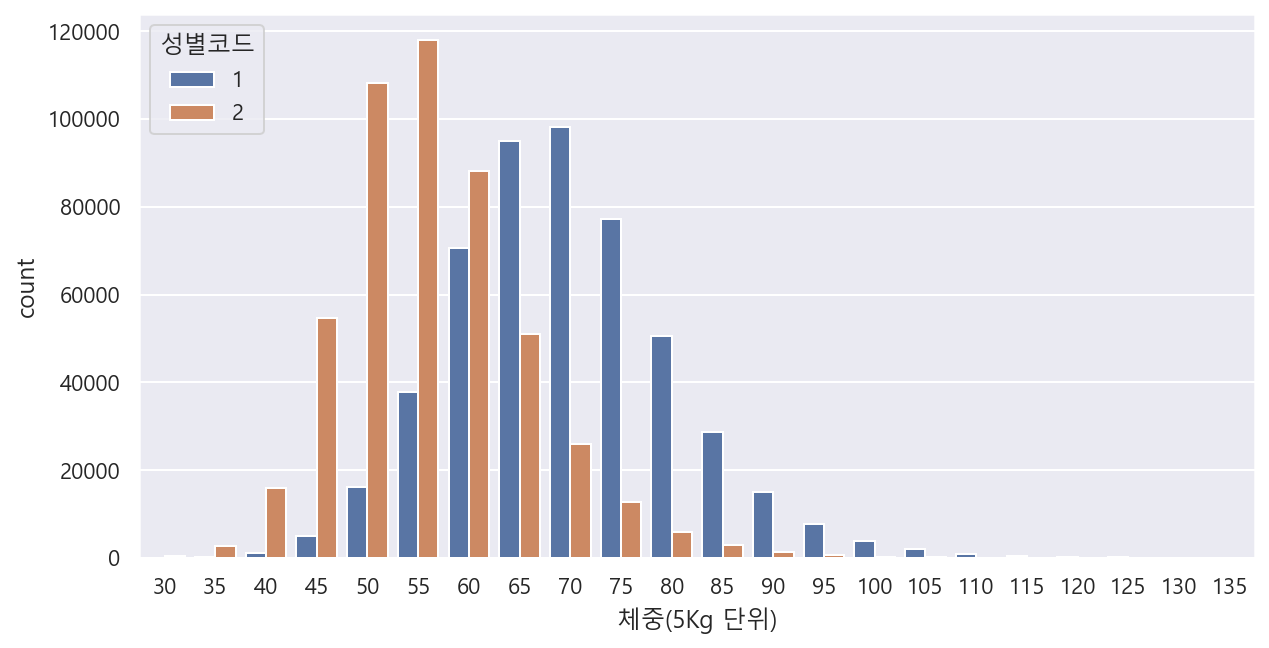

In [42]:
# 성별에 따른 체중의 차이를 봅니다.
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")


### 14.4 barplot- 수치형 vs 범주형 데이터 시각화

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

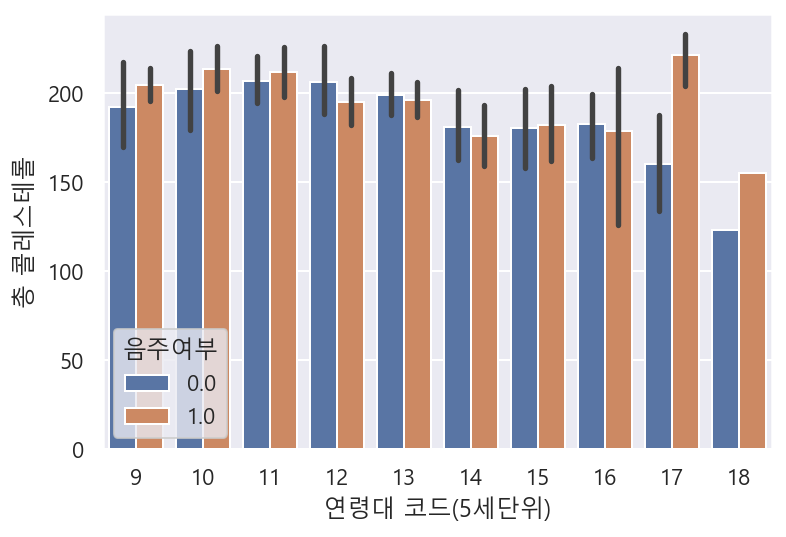

In [43]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

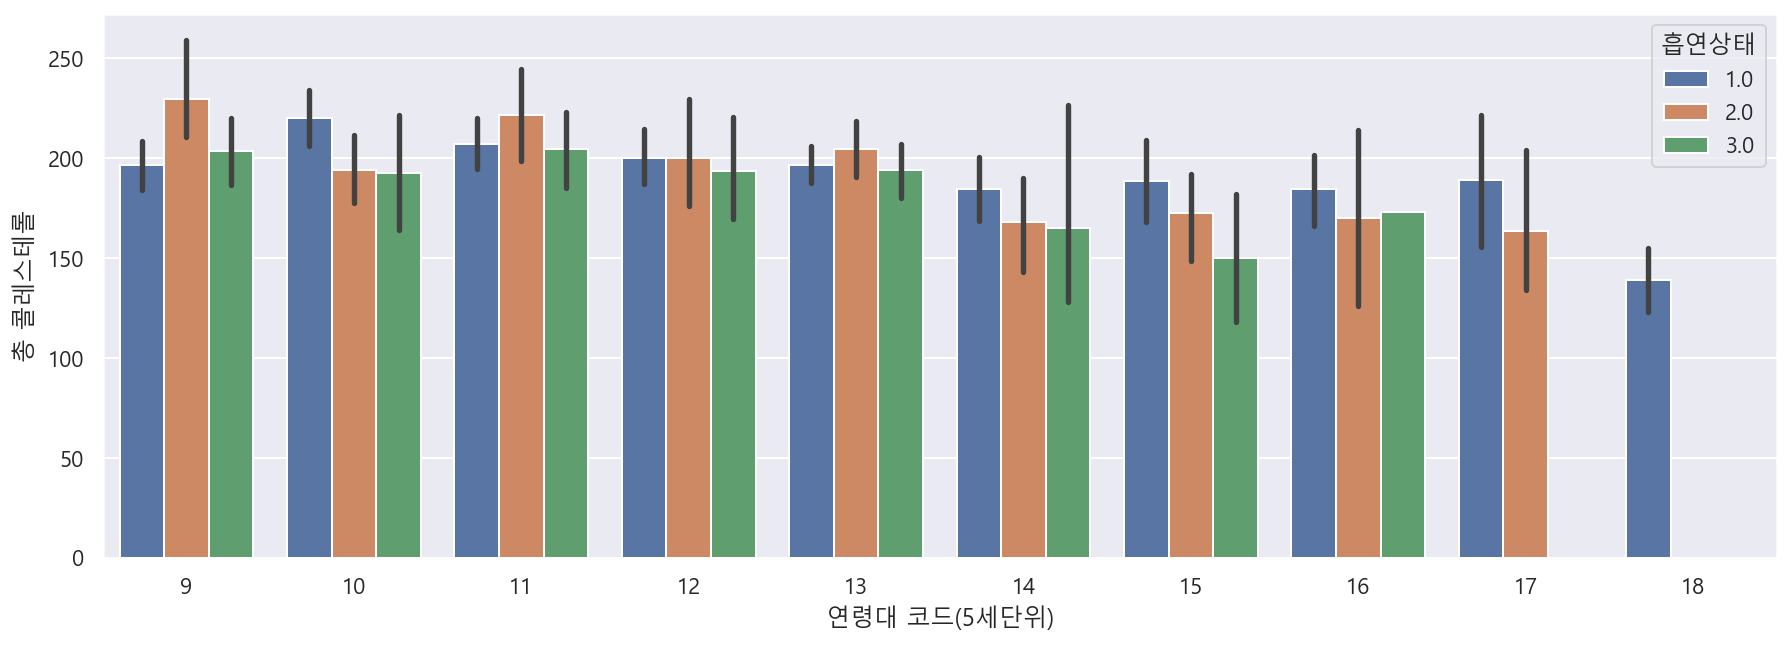

In [44]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그립니다.
plt.figure(figsize=(15,5))
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='트리글리세라이드'>

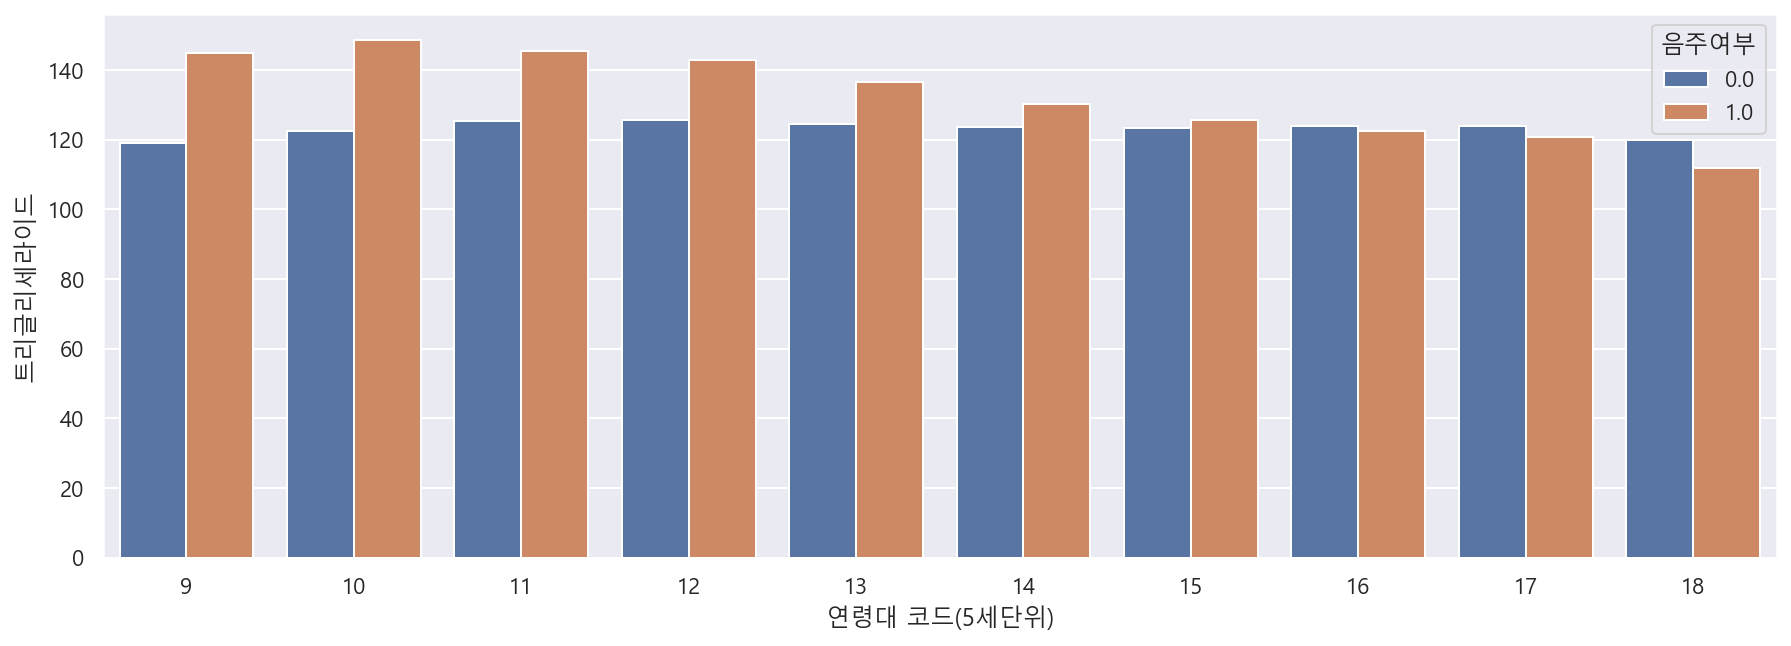

In [45]:
# 트리글리세라이드(중성지방) 에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그립니다.
plt.figure(figsize=(15,5))
sns.barplot(data=df, x="연령대 코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None)

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

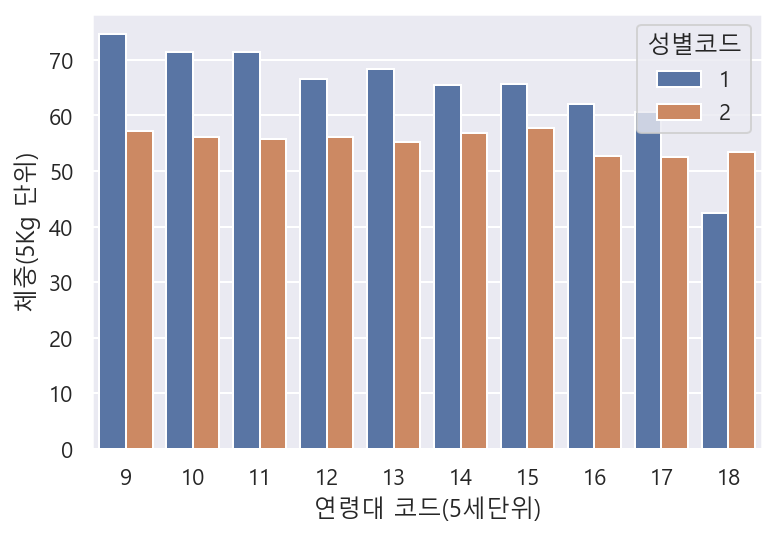

In [46]:
# 음주여부와 체중(5Kg 단위)을 성별에 따라 봅니다.
# ci 는 신뢰도 기본값은 95 None하면 없애고 "sd"는 표준편차
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드" , ci=None )

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

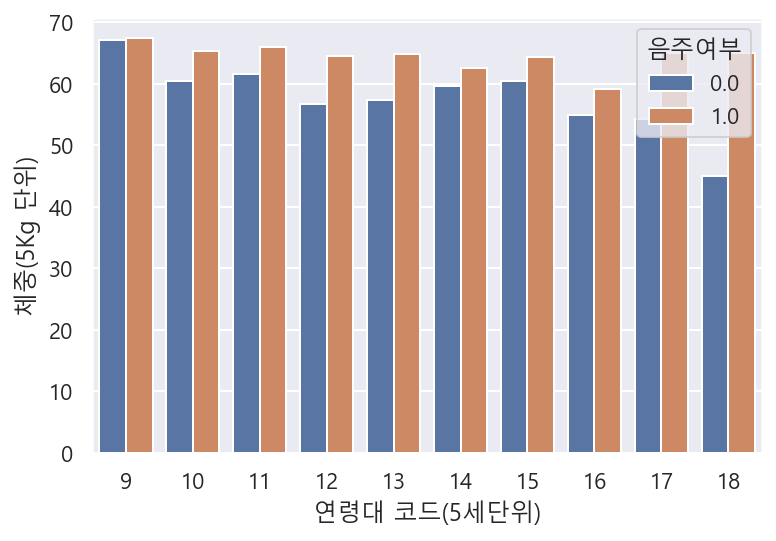

In [47]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위) 을 음주여부에 따라 barplot으로 그립니다.
# ci 는 신뢰도 기본값은 95 None하면 없애고 "sd"는 표준편차
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci=None)

### 14.5 lineplot and pointplot

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

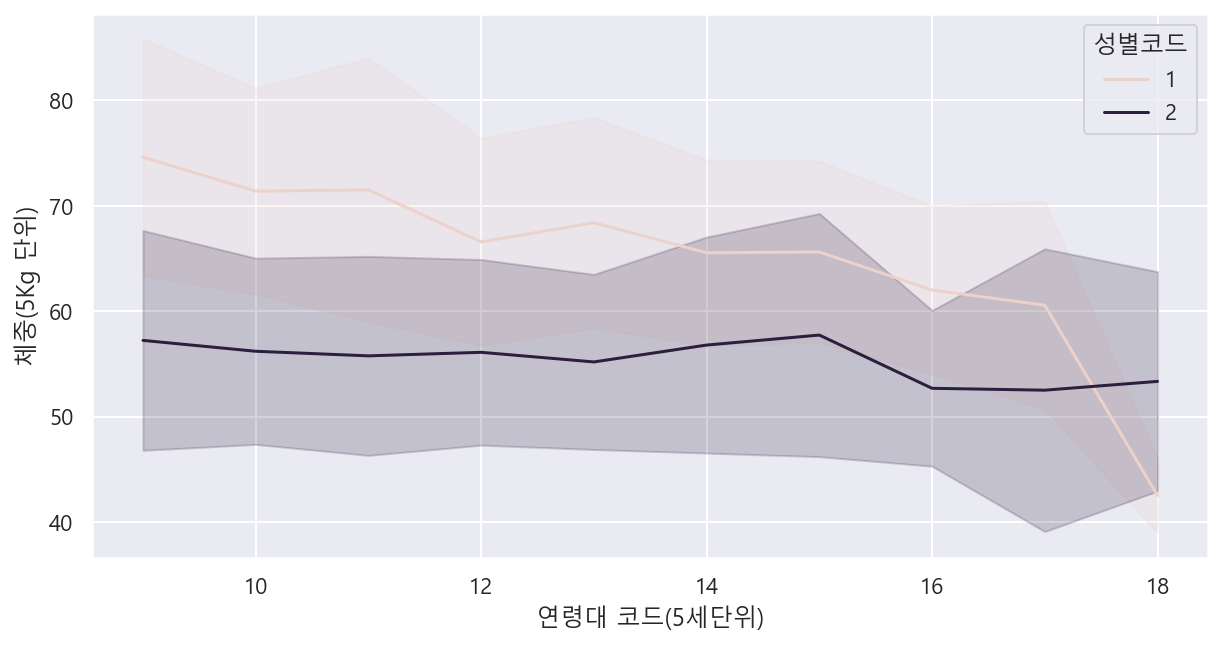

In [48]:
# 연령대 코드(5세단위) 에 따른 체중(5Kg 단위) 을 성별 코드에 따라 lineplot으로 그립니다.
# 신뢰도는 그림자를 통해 보여준다
plt.figure(figsize=(10,5))
sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

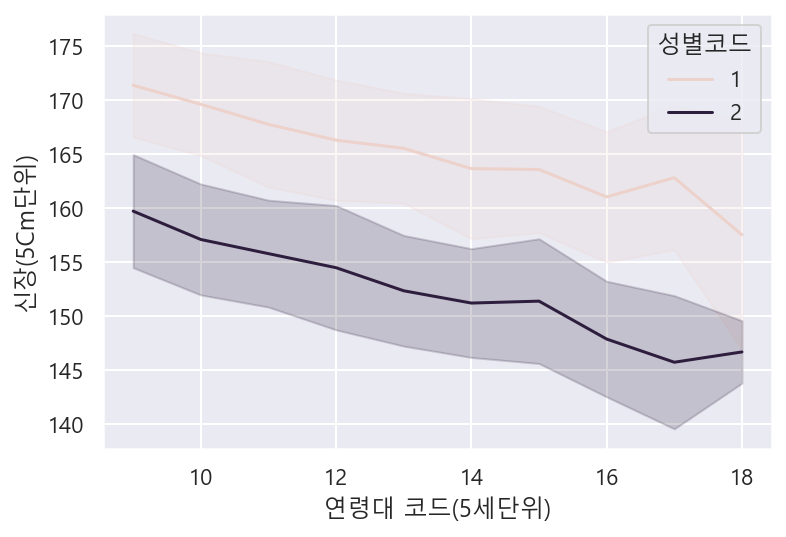

In [49]:
# 연령대 코드(5세단위) 에 따른 신장(5Cm단위) 을 성별 코드에 따라 lineplot으로 그립니다.
# 신뢰도는 그림자를 통해 보여준다
sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

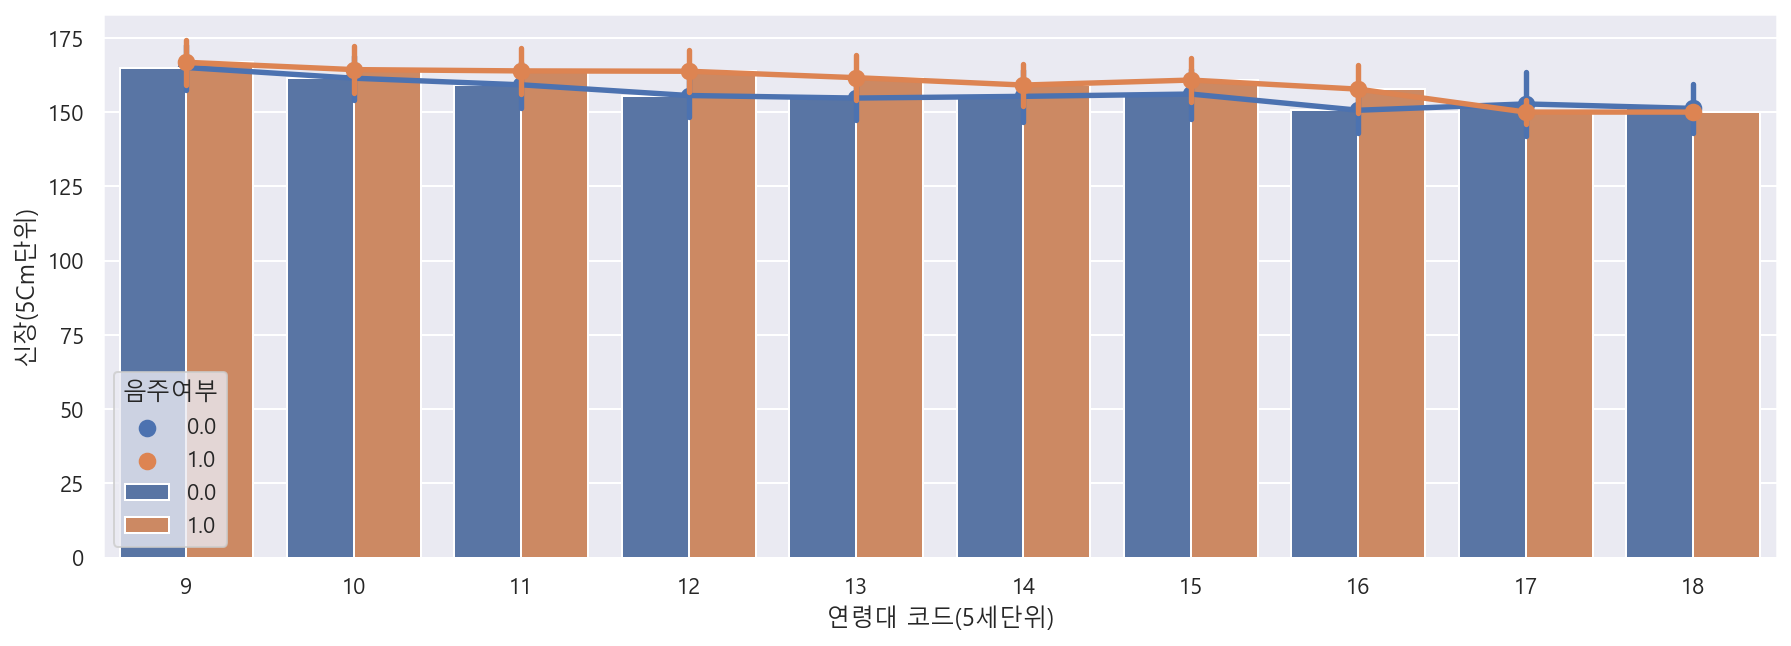

In [50]:
# 연령대 코드(5세단위) 에 따른 체중(5Kg 단위) 을 음주여부에 따라 pointplot과 barplot으로 그립니다.
plt.figure(figsize=(15,5))
sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci=None)

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

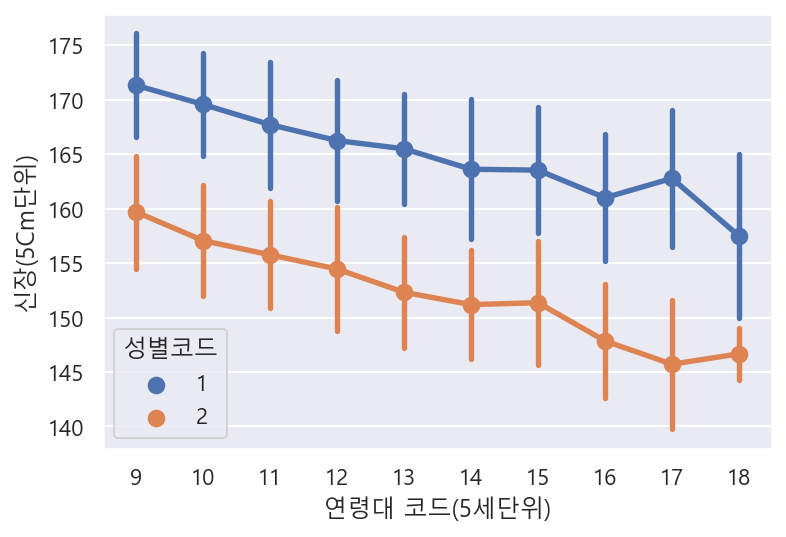

In [51]:
# 연령대 코드(5세단위) 에 따른 신장(5Cm 단위) 을 성별코드에 따라 pointplot으로 그립니다.

sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

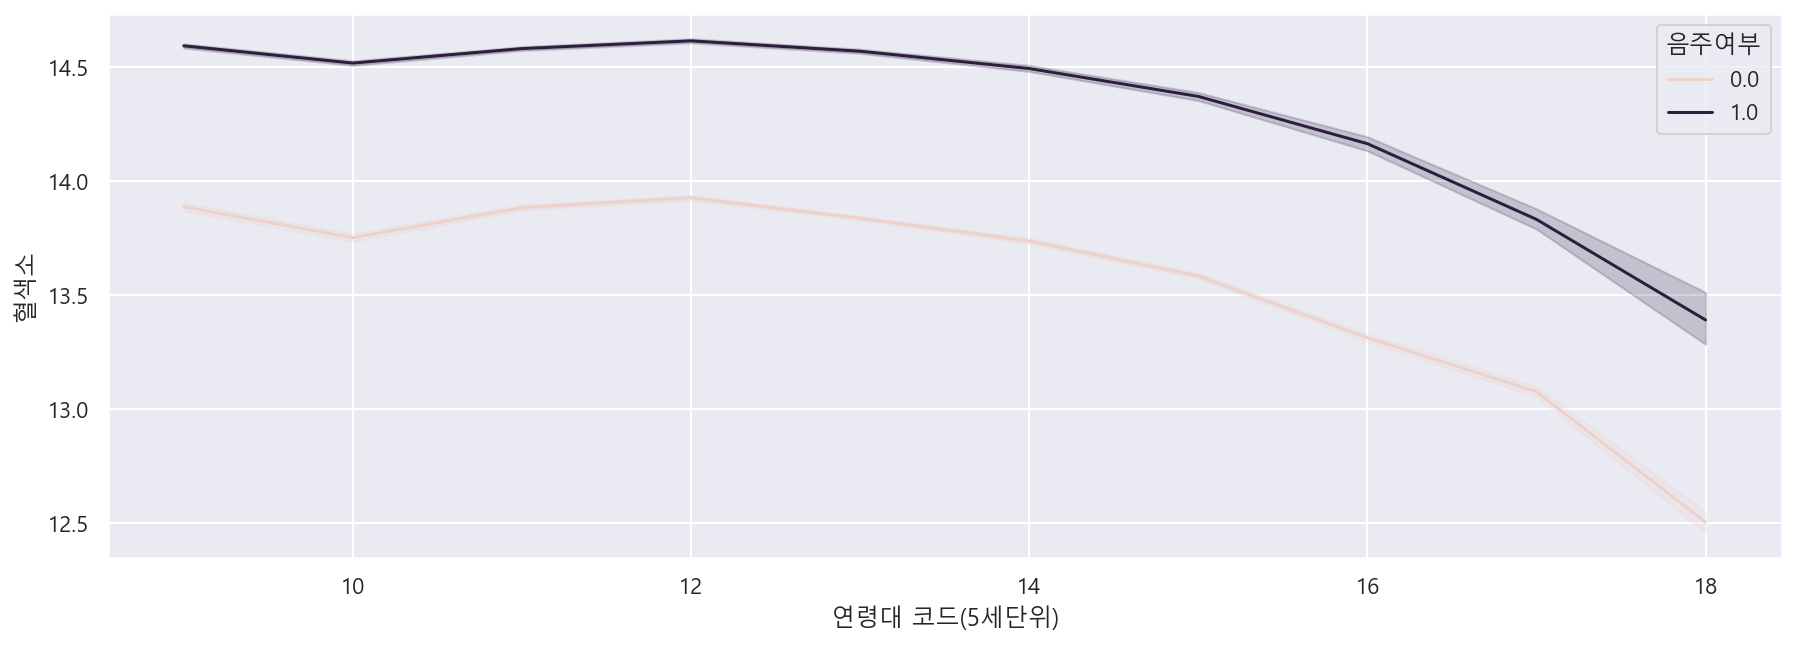

In [52]:
# 연령대 코드(5세단위) 에 따른 혈색소를 음주여부에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부")

### 14.6 boxplot
    * https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
    * https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
    * 상자 수염 그림 - 위키백과, 우리 모두의 백과사전
    * 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
    * 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.

    1. 최솟값
    2. 제 1사분위 수
    3. 제 2사분위 수(), 즉 중앙값
    4. 제 3사분위 수()
    5. 최댓값
    6. Box plot 이해하기:
        * 박스 플롯에 대하여 :: -[|]- Box and Whisker
        * Understanding Boxplots - Towards Data Science

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

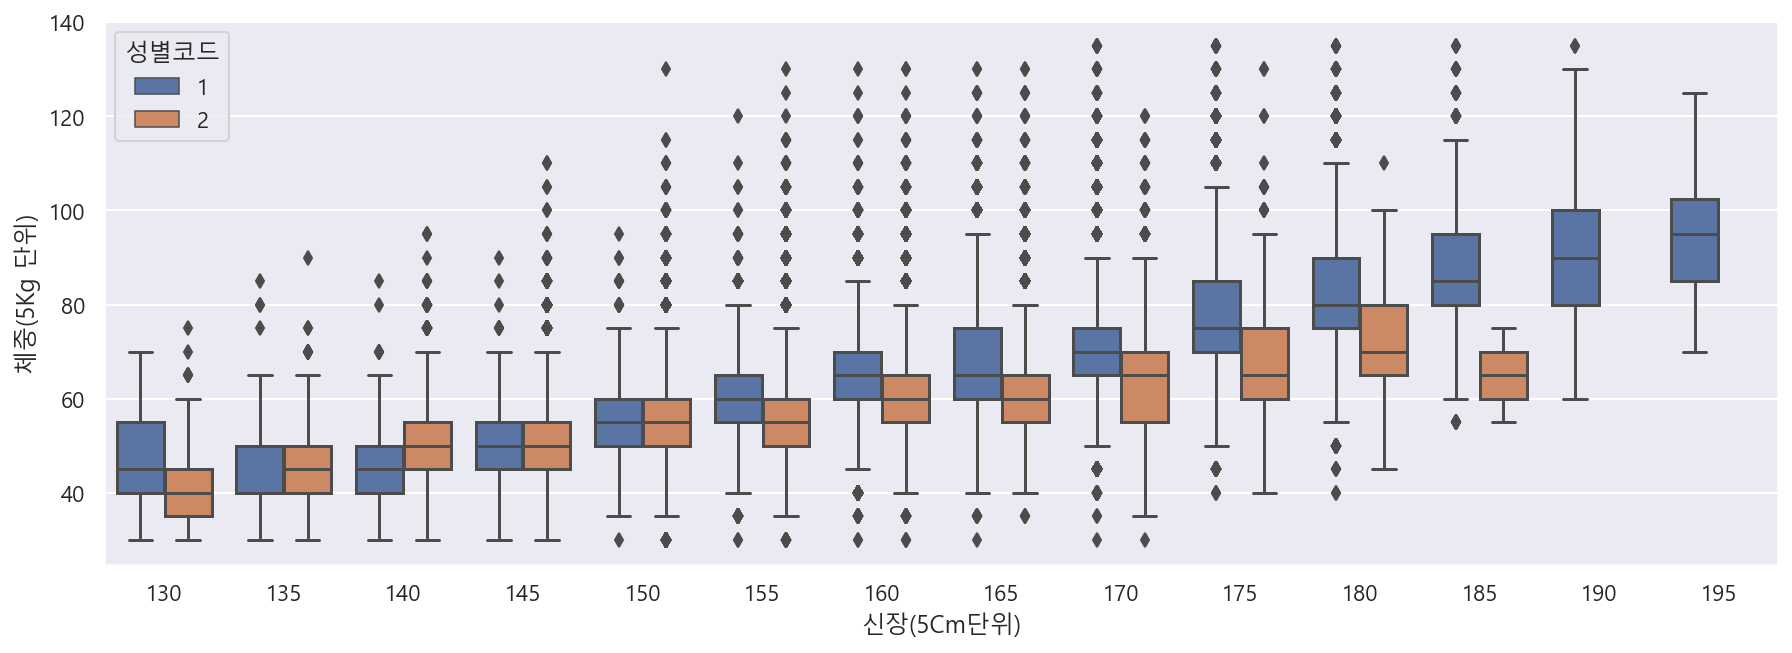

In [53]:
# boxplot으로 신장(5Cm단위) 에 따른 체중(5Kg 단위) 을 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

### 14.7 violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

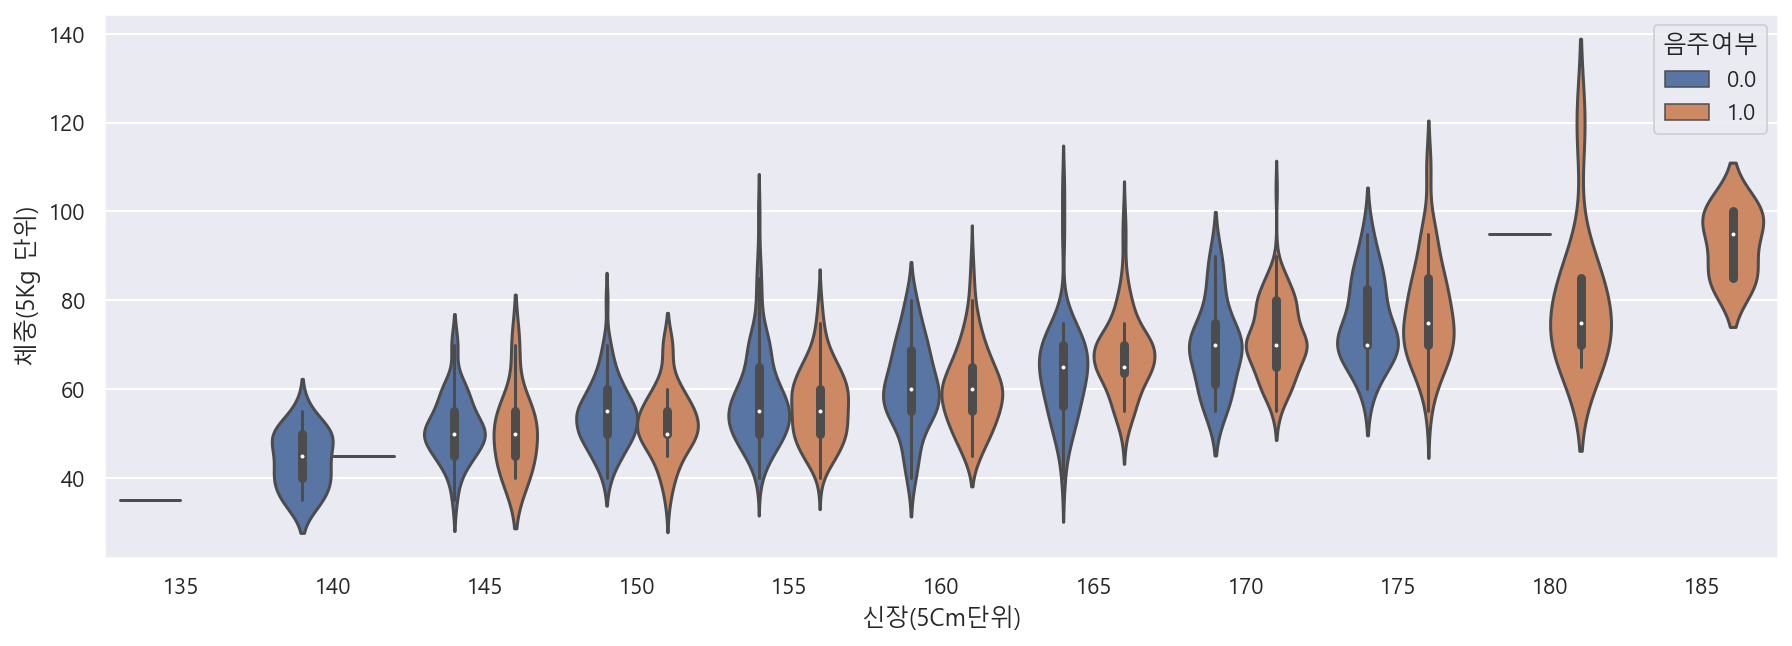

In [54]:
# violinplot 신장(5cm단위)에 따른 체중(5Kg 단위)을 그리며, 음주 여부에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15,5))
sns.violinplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

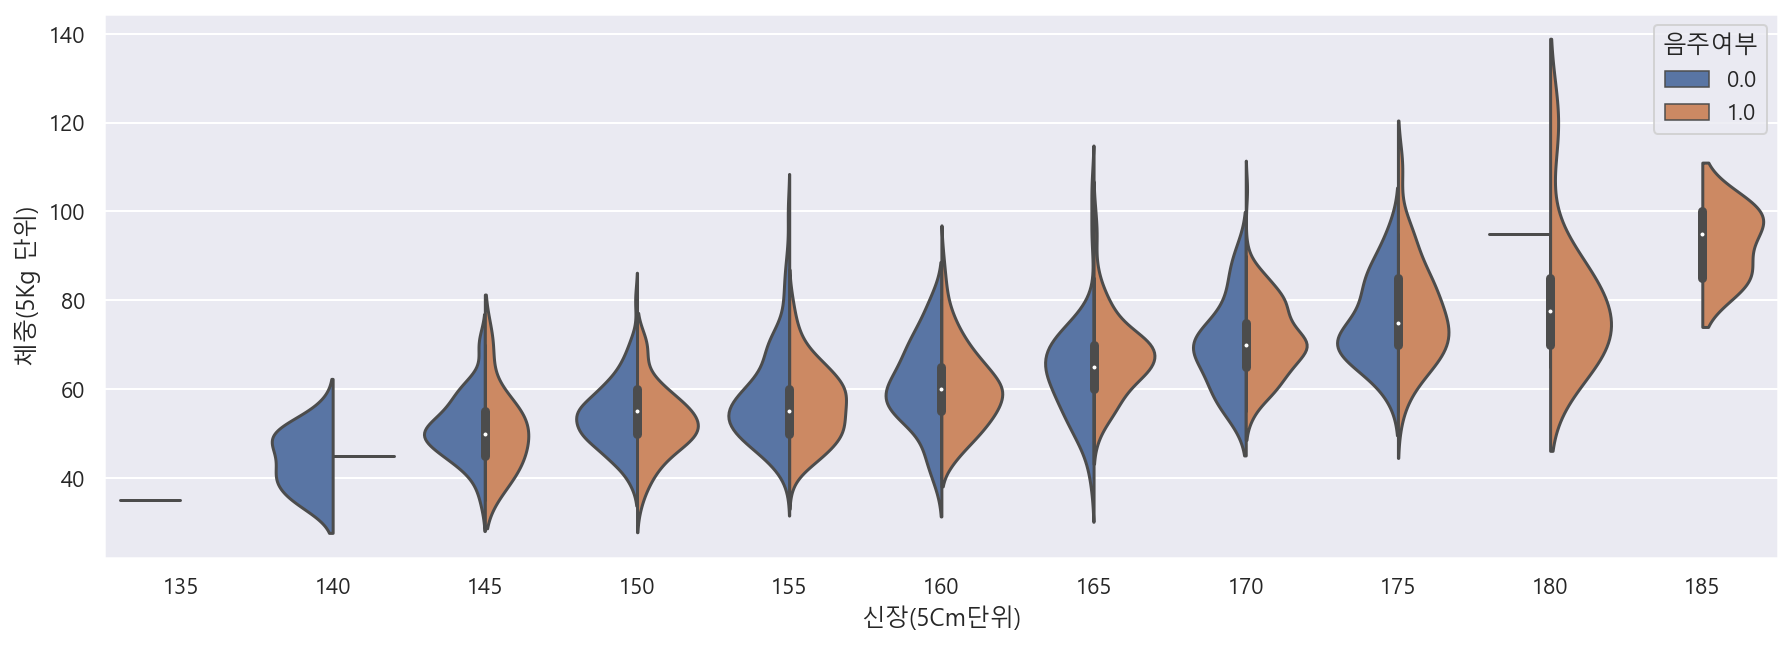

In [55]:
# violinplot의 split 기능을 사용해 봅니다.
plt.figure(figsize=(15,5))
sns.violinplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)", hue="음주여부" , split=True)

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='혈색소'>

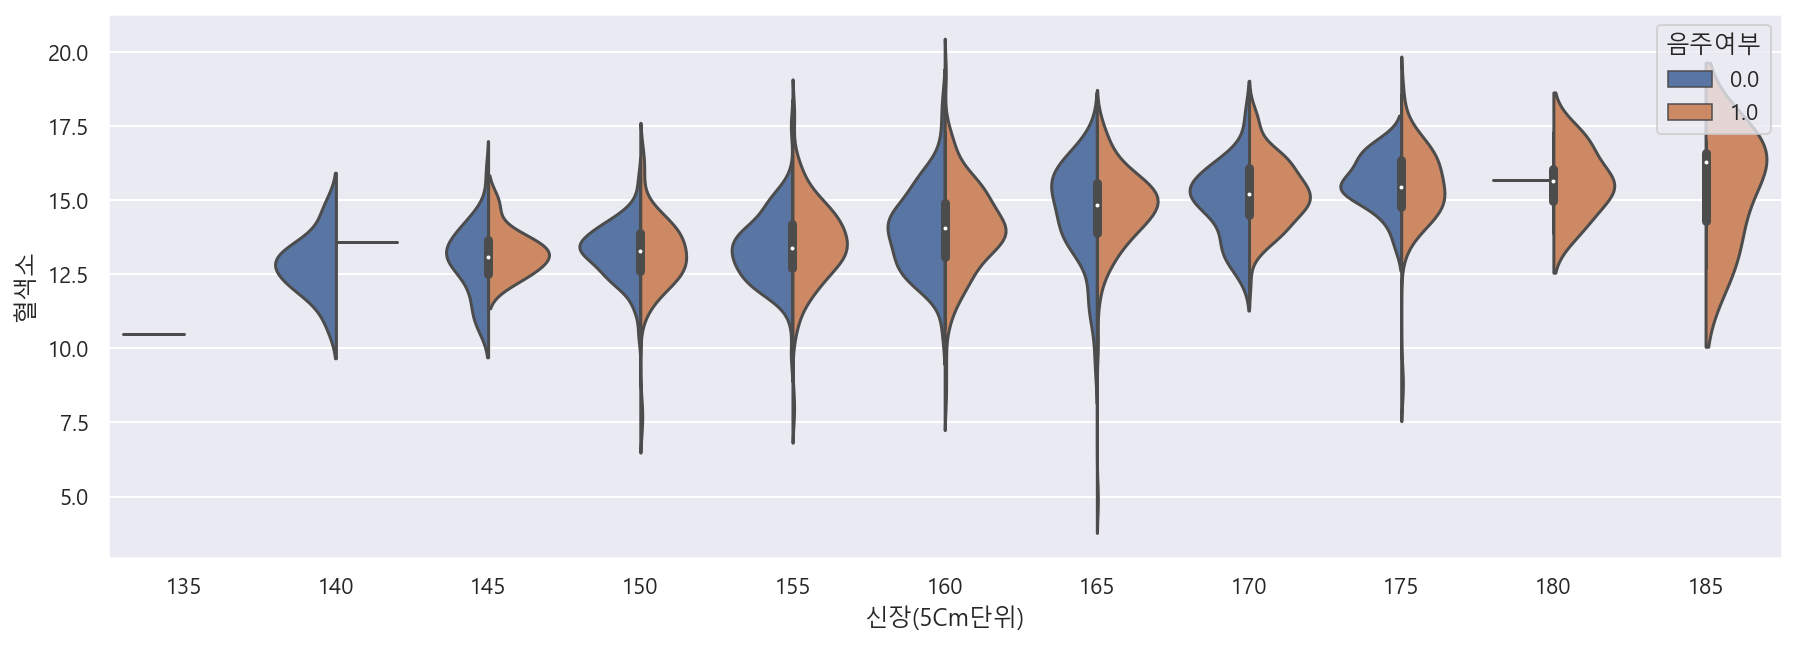

In [56]:
# violinplot 연령대코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15,5))
sns.violinplot(data=df_sample, x="신장(5Cm단위)",y="혈색소", hue="음주여부" , split=True)

### 14.8 swarm plot
    * 범주형 데이터를 산점도로 시각화하고자 할 때 사용합니다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.9% of the points

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

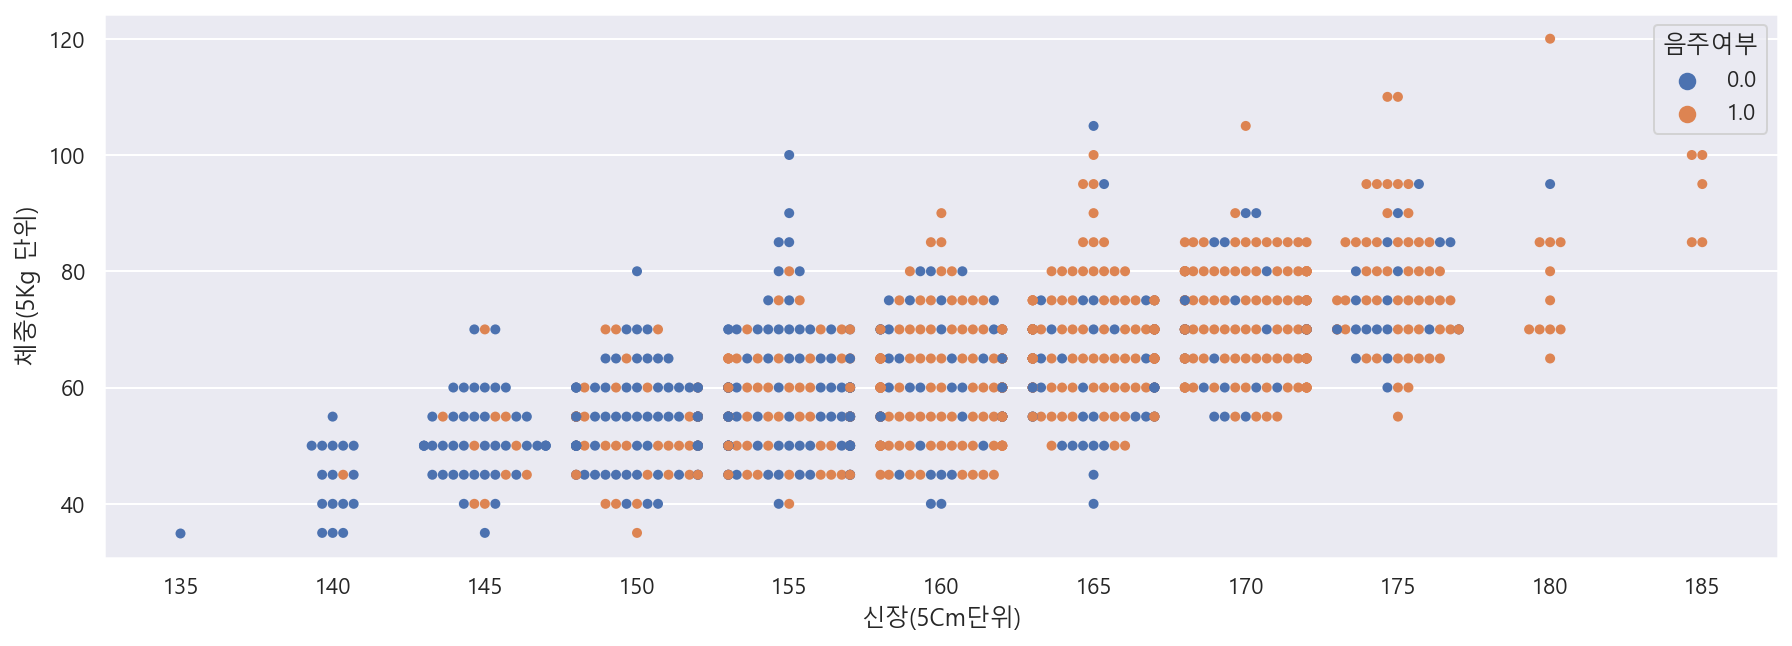

In [57]:
# swarmplot으로 신장(5Cm 단위)에 따른 체중(5Kg 단위)을 그리며 음주여부에 따라 다른색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.
plt.figure(figsize=(15,5))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)", hue="음주여부")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

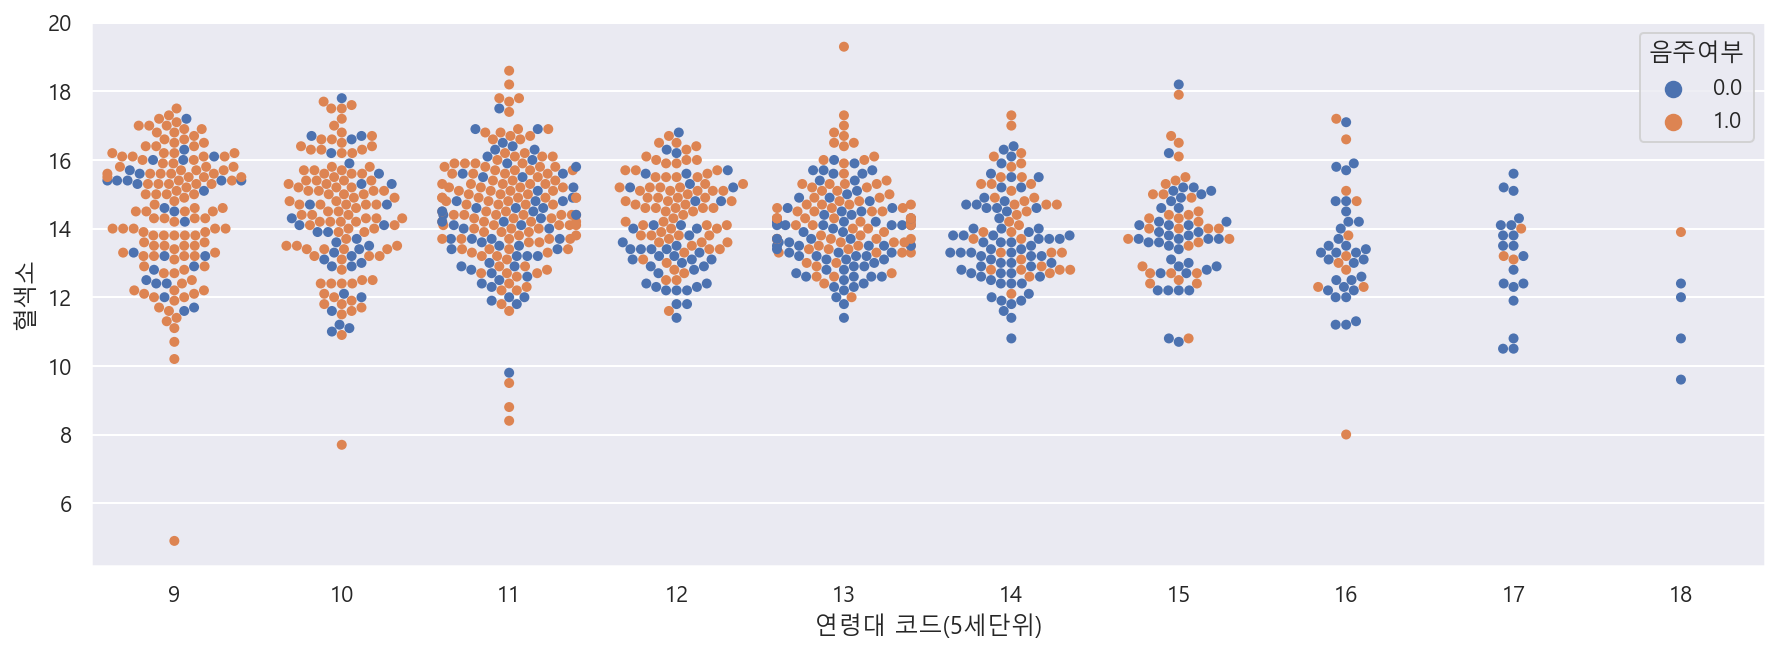

In [58]:
# swarmplot으로 연령대코드(5세단위)에 따른 체중(5Kg 단위)을 그리며 음주여부에 따라 다른색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.

plt.figure(figsize=(15,5))
sns.swarmplot(data=df_sample, x="연령대 코드(5세단위)",y="혈색소", hue="음주여부")

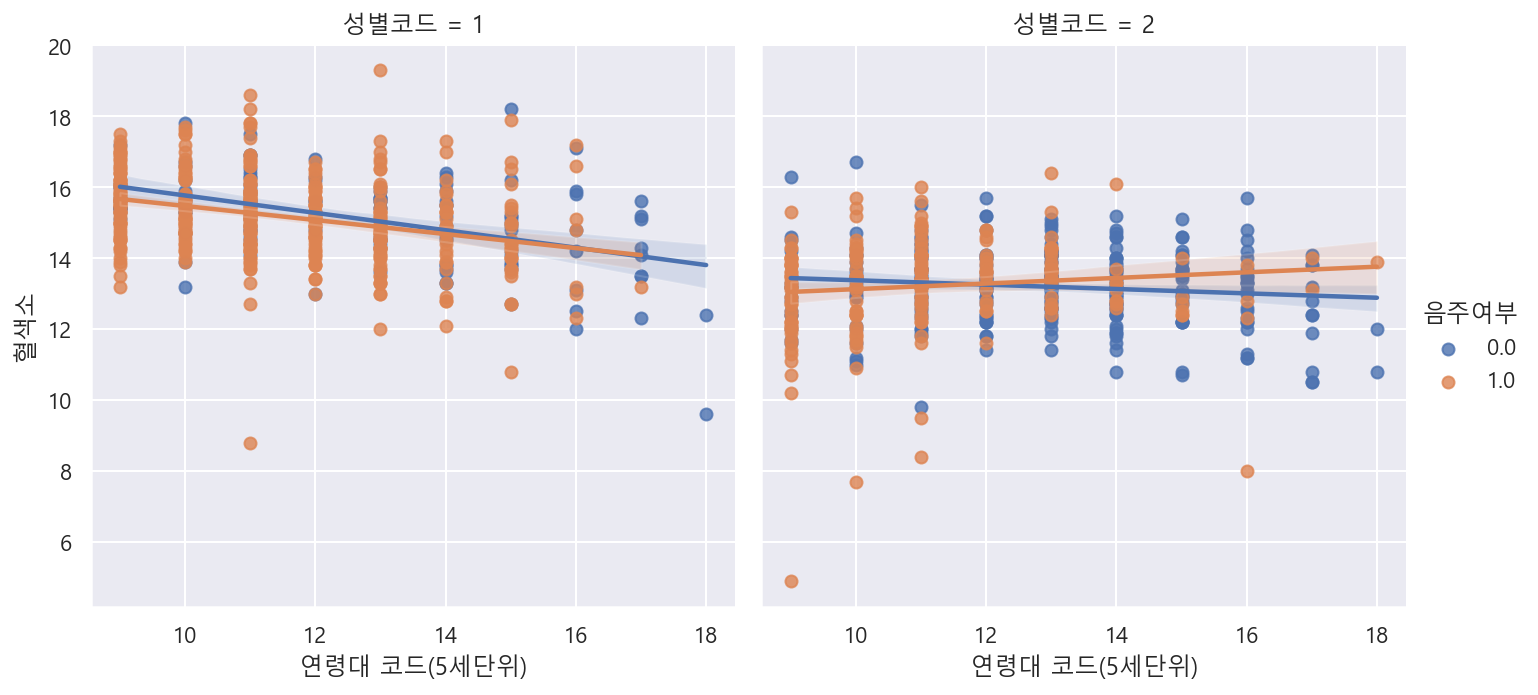

In [59]:
# lmplot으로 그리기
sns.lmplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")

# 15 수치형 데이터 시각화

### 15.1 scatterplot - 산점도
    * 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용합니다.
    * 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

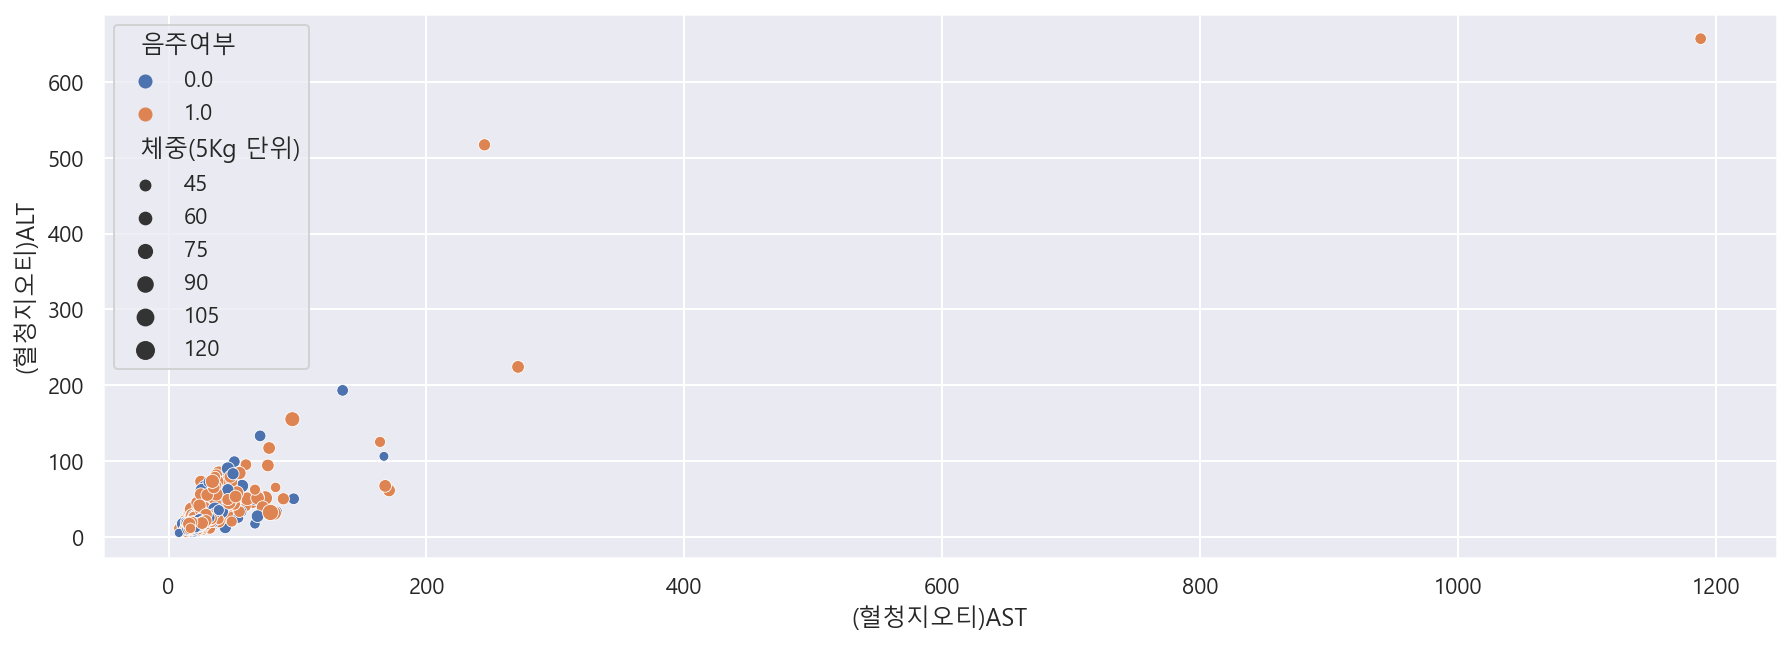

In [60]:
# scatterplot 으로 "(혈청지오티)AST", "(형청지오티)ALT"을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg 단위)")

### 15.2 lmplot- 상관 관계를 보기

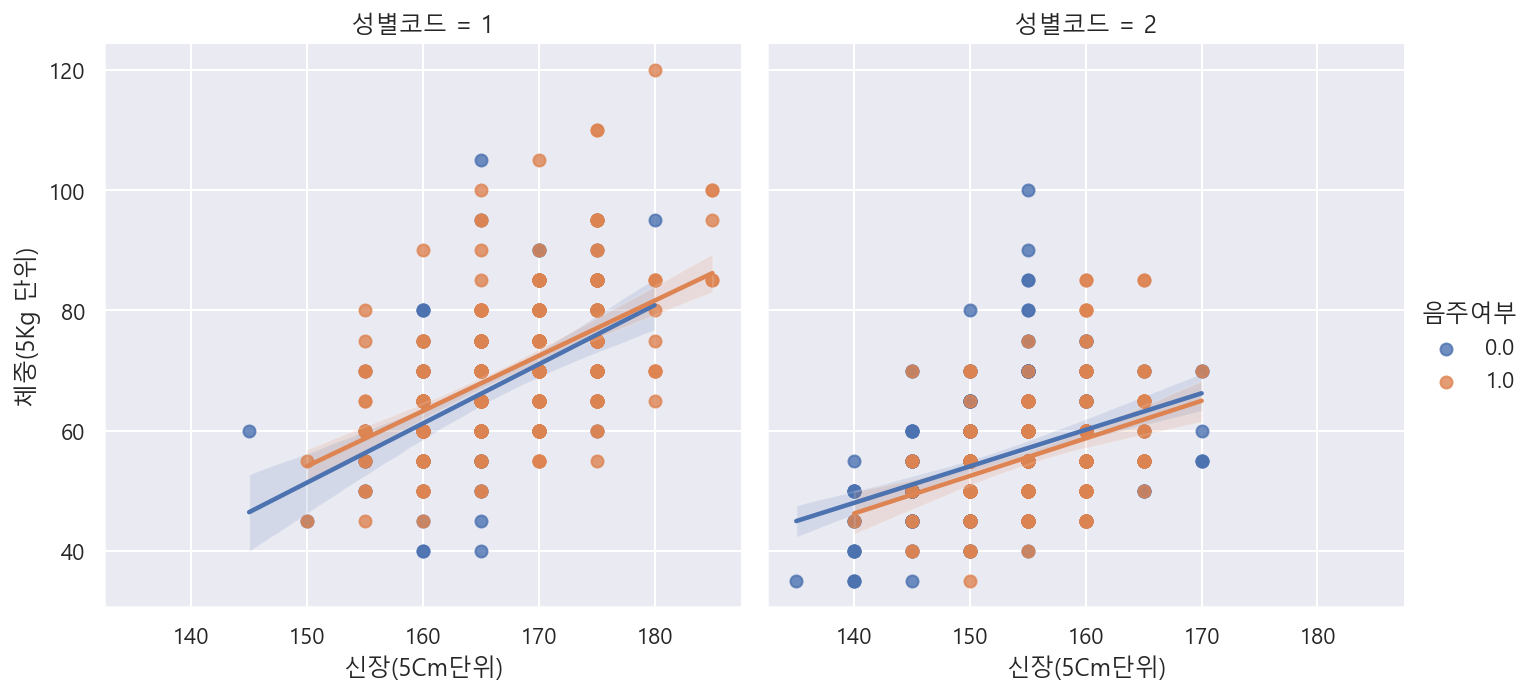

In [61]:
# lmplot 으로 신장(5Cm단위)에 따른 체중(5Kg 단위)을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", col="성별코드")

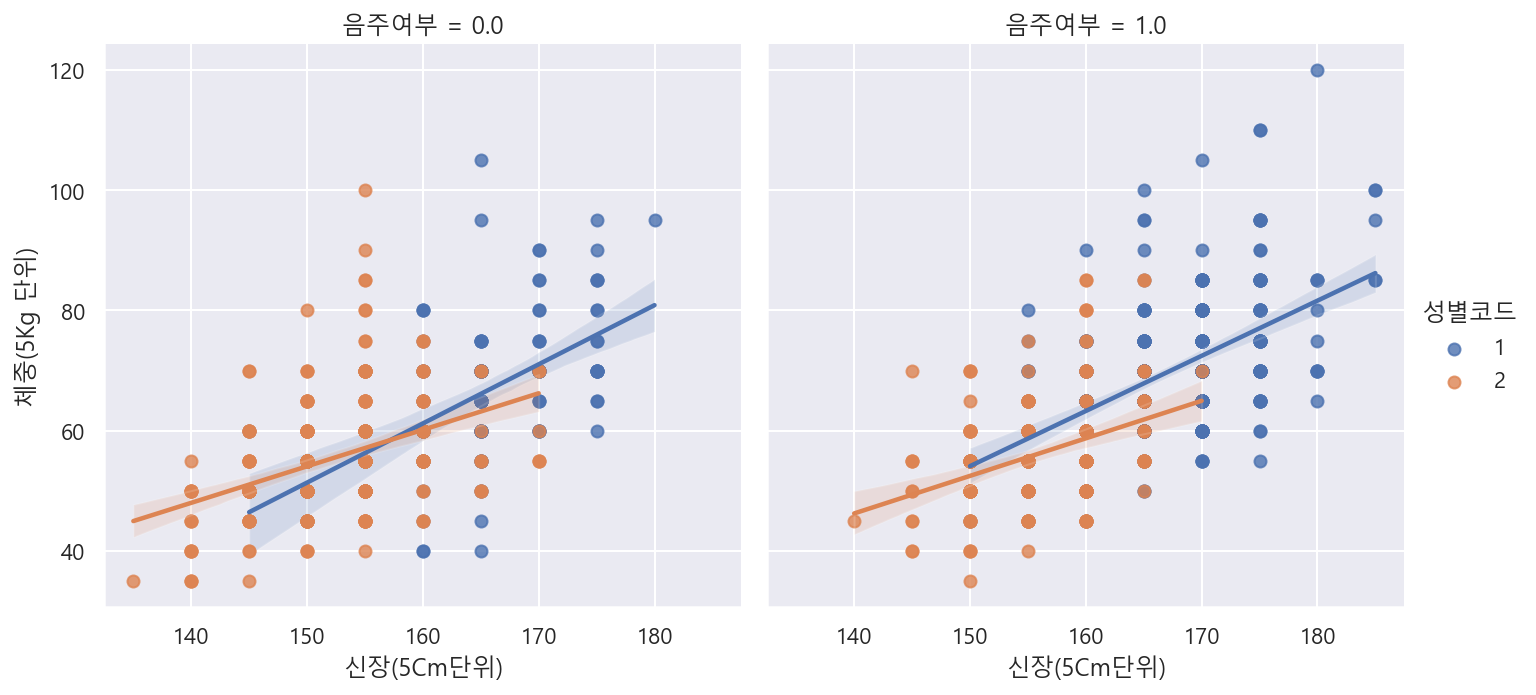

In [62]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯을 그려봅니다.
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드", col="음주여부")

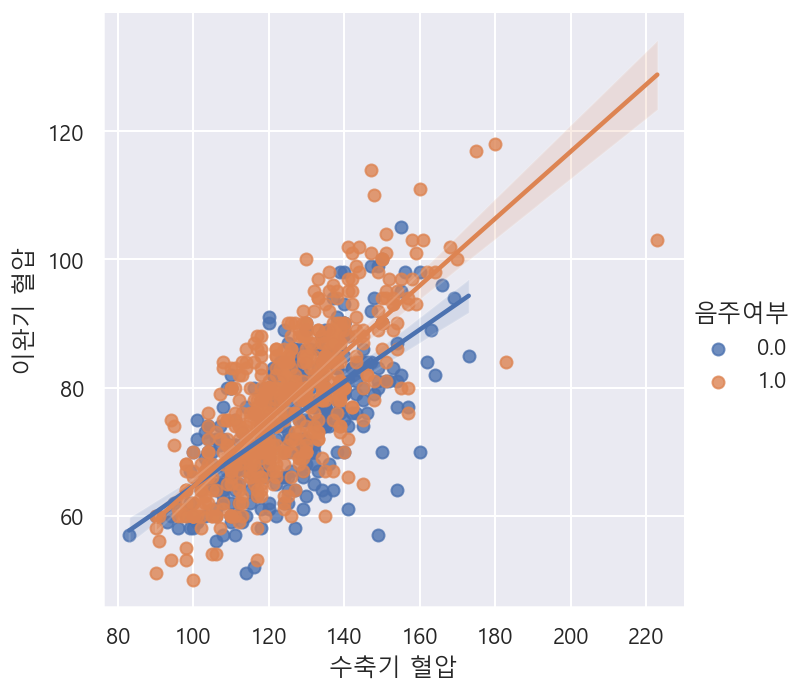

In [63]:
# lmplot으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.
sns.lmplot(data=df_sample, x="수축기 혈압", y="이완기 혈압", hue="음주여부")

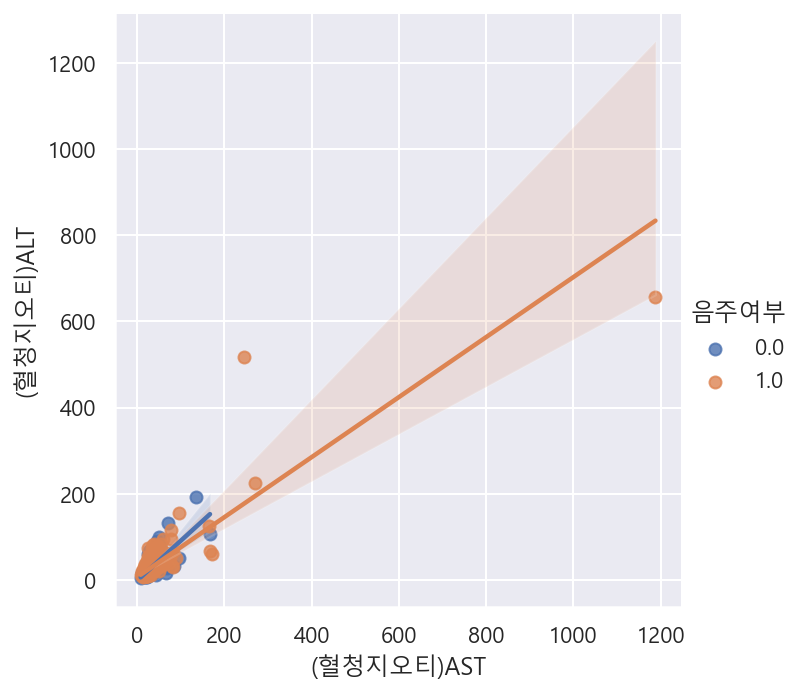

In [64]:
# lmplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.
# robust는 이상치
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

### 15.3 이상치 다루기
    * 이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 합니다.
    * 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도록 합니다.

In [65]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400 이하인 값만 데이터프레임 형태로 추출해서
# df_ASLT 라는 변수에 담습니다.
df_ASLT=df_sample[(df_sample["(혈청지오티)AST"]<400) &(df_sample["(혈청지오티)ALT"]<400)]
df_ASLT

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
276826  2020    276827    41     2            10        160          45  67.0   
849425  2020    849426    29     1            10        165          70  86.0   
504499  2020    504500    28     1            15        165          65  89.0   
601054  2020    601055    11     1            11        165          50  76.0   
980221  2020    980222    27     1            13        165          65  79.0   
...      ...       ...   ...   ...           ...        ...         ...   ...   
890013  2020    890014    41     1            11        175          85  93.0   
875389  2020    875390    11     1            10        170          70  81.0   
358458  2020    358459    31     1            12        170          65  83.0   
808228  2020    808229    27     1             9        175          75  87.0   
317698  2020    317699    26     2            13        150          50  72.0   

        시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  흡연상태  \
276826    1.2    1.2  ...      0.5        29.0        26.0    14.0   1.0   
849425    1.0    1.2  ...      0.8        31.0        25.0    28.0   1.0   
504499    0.9    0.9  ...      1.1        26.0        25.0    29.0   2.0   
601054    0.6    0.6  ...      1.2        65.0        44.0    35.0   1.0   
980221    1.2    1.2  ...      1.0        52.0        48.0    37.0   2.0   
...       ...    ...  ...      ...         ...         ...     ...   ...   
890013    1.0    1.0  ...      1.0        34.0        73.0    81.0   3.0   
875389    1.2    1.0  ...      1.0        26.0        18.0    50.0   1.0   
358458    1.0    1.0  ...      1.3        18.0        19.0    24.0   2.0   
808228    1.0    1.2  ...      0.8        16.0        17.0    40.0   2.0   
317698    1.0    0.9  ...      0.5        17.0        11.0    12.0   1.0   

        음주여부  구강검진 수검여부  치아우식증유무   치석    데이터 공개일자  
276826   0.0          1      0.0  1.0  2021-12-29  
849425   1.0          1      0.0  0.0  2021-12-29  
504499   0.0          0      NaN  NaN  2021-12-29  
601054   1.0          1      0.0  1.0  2021-12-29  
980221   1.0          0      NaN  NaN  2021-12-29  
...      ...        ...      ...  ...         ...  
890013   1.0          0      NaN  NaN  2021-12-29  
875389   1.0          0      NaN  NaN  2021-12-29  
358458   1.0          0      NaN  NaN  2021-12-29  
808228   1.0          0      NaN  NaN  2021-12-29  
317698   1.0          0      NaN  NaN  2021-12-29  

[993 rows x 31 columns]

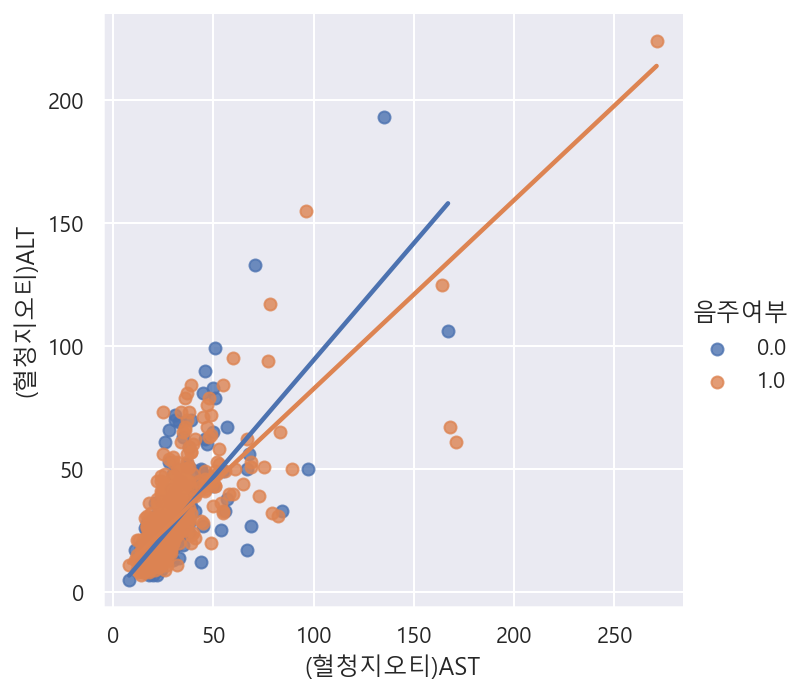

In [66]:
# 이상치를 제거한 "(혈청지오티)AST" 와 "(혈청지오티)ALT" 를 lmplot으로 그리며
# 음주여부에 따라 다른 색으로 표현합니다.
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [67]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400이상인 값만 데이터 프레임 형태로 추출해서
# df_ALST_high 라는 변수에 담습니다.
df_ASLT_high=df_sample[(df_sample["(혈청지오티)AST"]>400) &(df_sample["(혈청지오티)ALT"]>400)]
df_ASLT_high

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
409545  2020    409546    47     1            12        160          60  80.1   

        시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  흡연상태  \
409545    1.5    2.0  ...      0.8      1188.0       657.0   239.0   3.0   

        음주여부  구강검진 수검여부  치아우식증유무  치석    데이터 공개일자  
409545   1.0          0      NaN NaN  2021-12-29  

[1 rows x 31 columns]

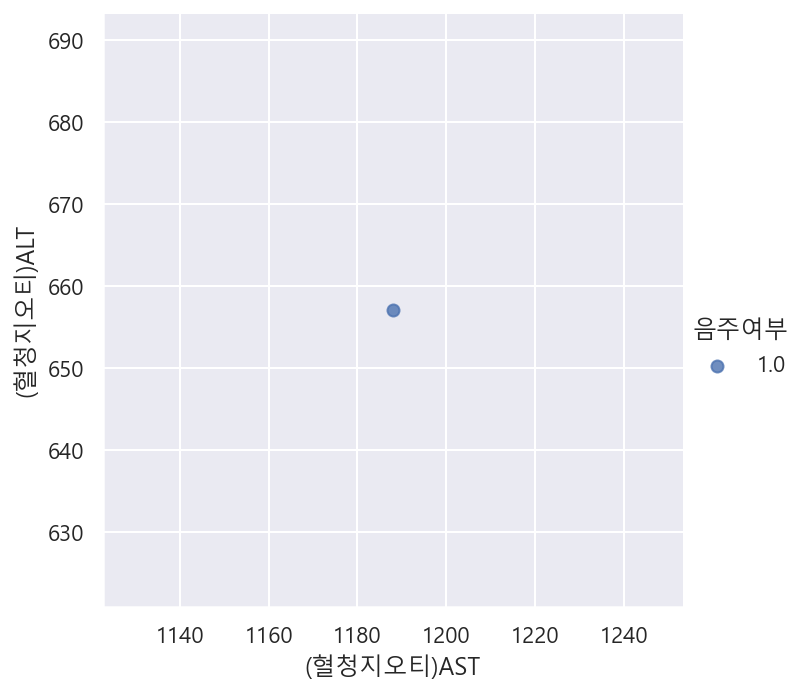

In [68]:
# 위에서 구한 df_ASLT_high 데이터 프레임에 담겨진 혈청지오티가 높은 데이터만 따로 봅니다.
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [69]:
df_ASLT_high_8000=df_ASLT_high[df_ASLT_high["(혈청지오티)AST"]>8000]
df_ASLT_high_8000.iloc[:, 4:27]

Empty DataFrame
Columns: [연령대 코드(5세단위), 신장(5Cm단위), 체중(5Kg 단위), 허리둘레, 시력(좌), 시력(우), 청력(좌), 청력(우), 수축기 혈압, 이완기 혈압, 식전혈당(공복혈당), 총 콜레스테롤, 트리글리세라이드, HDL 콜레스테롤, LDL 콜레스테롤, 혈색소, 요단백, 혈청크레아티닌, (혈청지오티)AST, (혈청지오티)ALT, 감마 지티피, 흡연상태, 음주여부]
Index: []

[0 rows x 23 columns]

### 15.4 distplot
    * 히스토그램
    * 확률 밀도 함수

In [70]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력합니다.
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

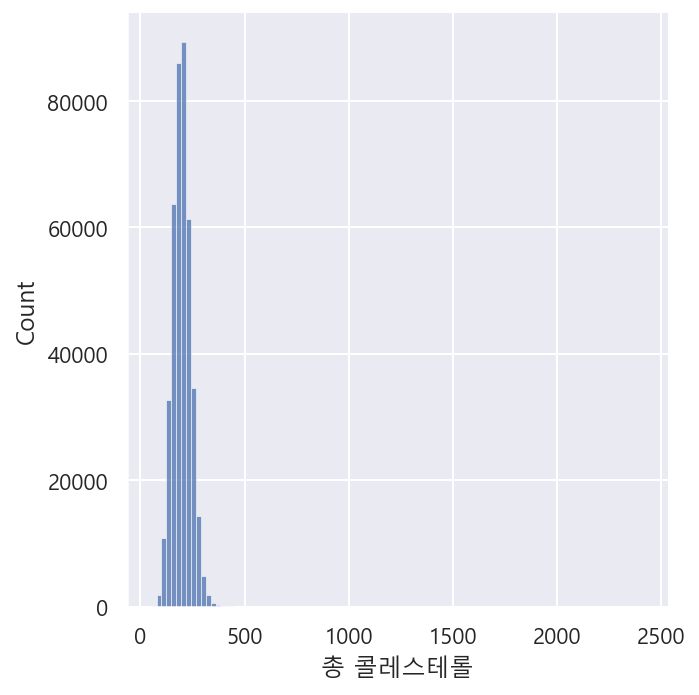

In [82]:
# "총콜레스테롤" 에 따른 displot 을 그립니다.
df_chol=df.loc[df['총 콜레스테롤'].notnull(), "총 콜레스테롤"]

sns.displot(df_chol, bins=100)

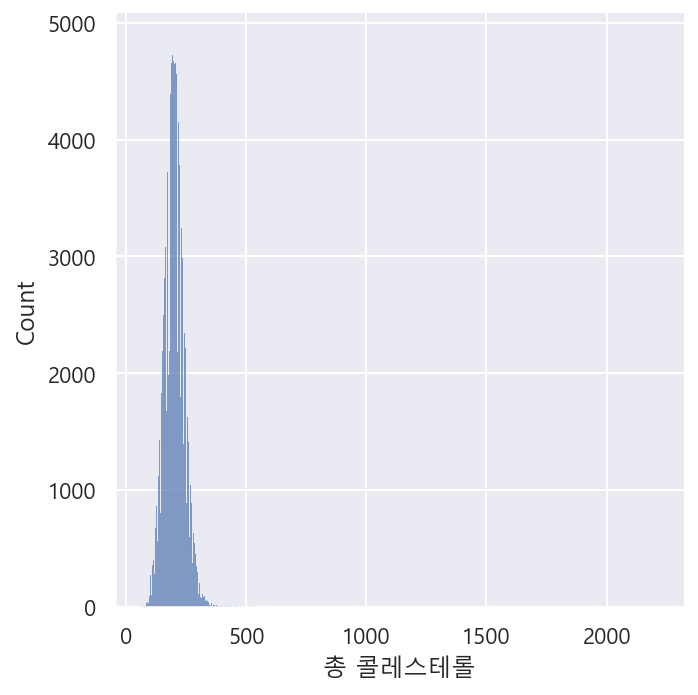

In [91]:
# 음주여부가 1인 값에 대한 "총콜레스테롤" 을 displot 으로 그립니다.
sns.displot(df.loc[df['총 콜레스테롤'].notnull() & (df ["음주여부"]==1), "총 콜레스테롤"])

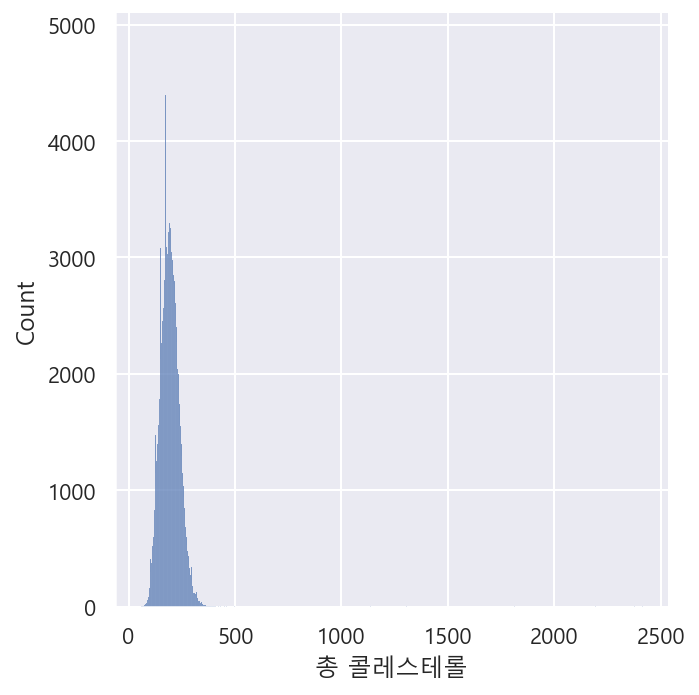

In [93]:
# 음주여부가 0인 값에 대한 "총콜레스테롤" 을 displot 으로 그립니다.
sns.displot(df.loc[df['총 콜레스테롤'].notnull() & (df ["음주여부"]==0), "총 콜레스테롤"])

<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

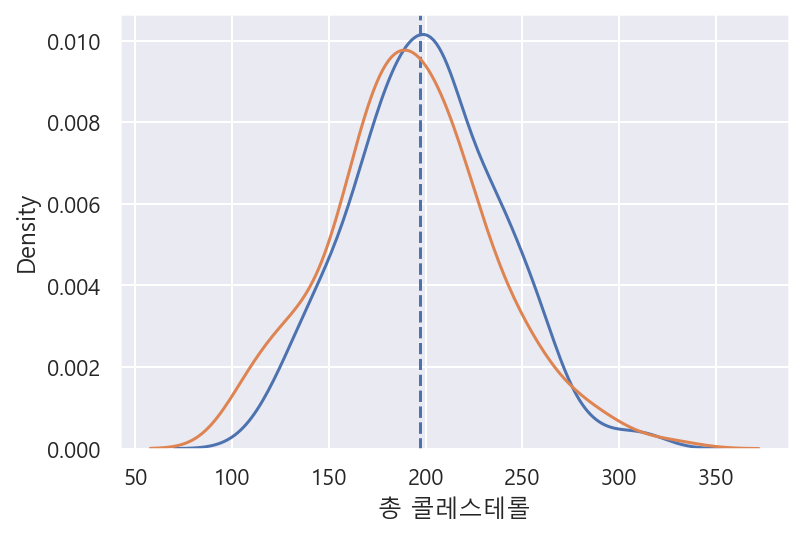

In [104]:
# 음주여부 값에 대한 "총 콜레스테롤"을 displot  으로 그리며, 하나의 그래프에 표시되도록 그립니다.
plt.axvline(df_sample["총 콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총 콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df.loc[df_sample['총 콜레스테롤'].notnull() & (df ["음주여부"]==1), "총 콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[df_sample['총 콜레스테롤'].notnull() & (df ["음주여부"]==0), "총 콜레스테롤"], label="음주 안 함")

<AxesSubplot:xlabel='감마 지티피', ylabel='Density'>

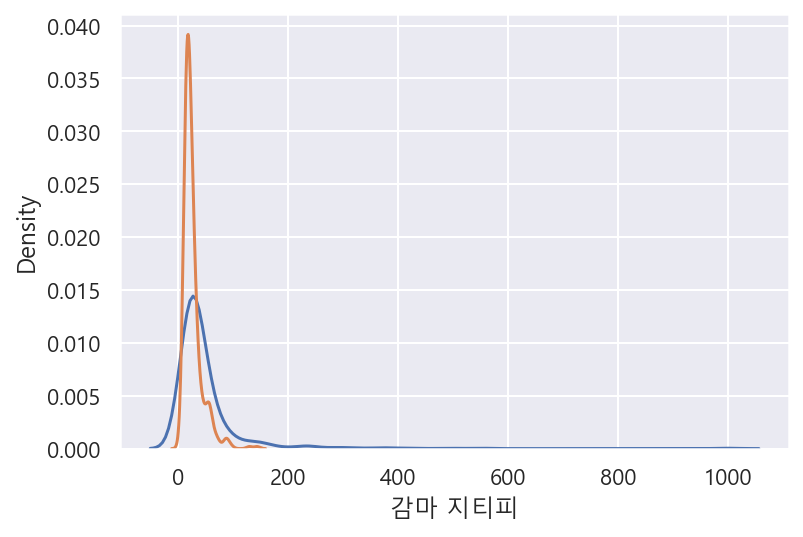

In [118]:
# 감마지티피 값에 따라 음주여부를 시각화 합니다.
s_1=df_sample.loc[df_sample["음주여부"] == 1, '감마 지티피']
s_0=df_sample.loc[df_sample["음주여부"] == 0, '감마 지티피']
sns.kdeplot(s_1, label="음주 중")
sns.kdeplot(s_0, label="음주 안 함")

# 16 상관 분석
    * 상관 분석
        * r이 -1.0 과 -0.7 사이이면, 강한 음적 선형관계,
        * r이 -0.7 과 -0.3 사이라면, 뚜렷한 음적 선형관계,
        * r이 -0.3 과 -0.1 사이라면, 약한 음적 선형관계,
        * r이 -0.1 과 +0.1 사이라면, 거의 무시될 수 있는 선형관계,
        * r이 +0.1 과 +0.3 사이라면, 약한 양적 선형관계,
        * r이 +0.3 과 +0.7 사이라면, 뚜렷한 양적 선형관계,
        * r이 +0.7 과 +1.0 사이라면, 강한 양적 선형관계

In [120]:
# 상관계수에 사용할 컬럼을 변수에 담습니다.
columns=df.columns
columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

### 16.1 상관계수 구하기

In [128]:
# 샘플컬럼만 가져와서 df_small 이라는 데이터 프레임에 담은 뒤 상관계수를 구합니다.
df_small=df_sample[columns]
df_corr=df_small.corr()
df_corr

기준년도  가입자 일련번호      시도코드      성별코드  연령대 코드(5세단위)  신장(5Cm단위)  \
기준년도           NaN       NaN       NaN       NaN           NaN        NaN   
가입자 일련번호       NaN  1.000000 -0.063560 -0.006128      0.066916  -0.029740   
시도코드           NaN -0.063560  1.000000 -0.008274      0.018369  -0.035344   
성별코드           NaN -0.006128 -0.008274  1.000000      0.092153  -0.723209   
연령대 코드(5세단위)   NaN  0.066916  0.018369  0.092153      1.000000  -0.414363   
신장(5Cm단위)      NaN -0.029740 -0.035344 -0.723209     -0.414363   1.000000   
체중(5Kg 단위)     NaN -0.037336 -0.013870 -0.544135     -0.221678   0.658184   
허리둘레           NaN -0.013002  0.000633 -0.397654      0.102985   0.343317   
시력(좌)          NaN -0.008921  0.053063 -0.087279     -0.237792   0.152171   
시력(우)          NaN -0.016696  0.036390 -0.074300     -0.137480   0.128649   
청력(좌)          NaN  0.031938 -0.007343 -0.033349      0.184846  -0.076783   
청력(우)          NaN -0.036814 -0.001627 -0.018490      0.203279  -0.084849   
수축기 혈압         NaN  0.031160  0.003886 -0.108233      0.216743   0.012064   
이완기 혈압         NaN  0.030414 -0.018792 -0.205170     -0.038870   0.187853   
식전혈당(공복혈당)     NaN -0.015215  0.002693 -0.119383      0.062979   0.069591   
총 콜레스테롤        NaN -0.038800 -0.025941  0.039545     -0.231089   0.053598   
트리글리세라이드       NaN  0.015585  0.061240 -0.222056     -0.048548   0.176851   
HDL 콜레스테롤      NaN -0.011495 -0.031216  0.328056     -0.061317  -0.217301   
LDL 콜레스테롤      NaN -0.030149 -0.042789  0.013703     -0.232499   0.086425   
혈색소            NaN -0.012036 -0.022500 -0.627238     -0.199607   0.529142   
요단백            NaN -0.058276 -0.044291 -0.056872      0.029036   0.018102   
혈청크레아티닌        NaN  0.059622 -0.042640 -0.512459      0.056892   0.332333   
(혈청지오티)AST     NaN -0.000847  0.013695 -0.076123      0.034710   0.017348   
(혈청지오티)ALT     NaN  0.017229 -0.000295 -0.170743     -0.040384   0.105957   
감마 지티피         NaN -0.048078 -0.022977 -0.270535     -0.066488   0.188727   
흡연상태           NaN -0.046266  0.033107 -0.588455     -0.164761   0.472717   
음주여부           NaN -0.027533 -0.066499 -0.346107     -0.351909   0.382014   
구강검진 수검여부      NaN -0.009999  0.009421 -0.041862     -0.080609   0.041420   
치아우식증유무        NaN  0.026276  0.007789 -0.041243     -0.105833   0.101973   
치석             NaN  0.035467 -0.163003 -0.001831     -0.036287   0.000341   

              체중(5Kg 단위)      허리둘레     시력(좌)     시력(우)  ...       요단백  \
기준년도                 NaN       NaN       NaN       NaN  ...       NaN   
가입자 일련번호       -0.037336 -0.013002 -0.008921 -0.016696  ... -0.058276   
시도코드           -0.013870  0.000633  0.053063  0.036390  ... -0.044291   
성별코드           -0.544135 -0.397654 -0.087279 -0.074300  ... -0.056872   
연령대 코드(5세단위)   -0.221678  0.102985 -0.237792 -0.137480  ...  0.029036   
신장(5Cm단위)       0.658184  0.343317  0.152171  0.128649  ...  0.018102   
체중(5Kg 단위)      1.000000  0.805619  0.081166  0.079245  ...  0.047369   
허리둘레            0.805619  1.000000 -0.044147  0.009605  ...  0.081128   
시력(좌)           0.081166 -0.044147  1.000000  0.433458  ... -0.045523   
시력(우)           0.079245  0.009605  0.433458  1.000000  ... -0.020949   
청력(좌)          -0.028658  0.045806 -0.047886  0.006876  ...  0.036570   
청력(우)          -0.048024  0.040701 -0.074372  0.068536  ...  0.085775   
수축기 혈압          0.215313  0.283801 -0.052692  0.028258  ...  0.081573   
이완기 혈압          0.283006  0.244159  0.052792  0.088776  ...  0.066156   
식전혈당(공복혈당)      0.113435  0.173156 -0.067750 -0.028508  ...  0.113726   
총 콜레스테롤         0.009567 -0.027682  0.151671  0.034606  ... -0.072645   
트리글리세라이드        0.251723  0.246838  0.056149  0.020223  ... -0.008218   
HDL 콜레스테롤      -0.376817 -0.371869  0.083304  0.048880  ...  0.020827   
LDL 콜레스테롤       0.048177 -0.010353  0.121976  0.015400  ... -0.093446   
혈색소             0.442815  0.309017  0.177170  0.100567  ...  0.058647   
요단백             0.047369  0.081128 -0.045523 -0.020949  ...  1.000000   
혈청크레아티닌         0.29

In [134]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
# df_corr["신장(5Cm단위)"].sort_values()
df_corr.loc[df_corr["신장(5Cm단위)"]>0.3, "신장(5Cm단위)"]

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.658184
허리둘레          0.343317
혈색소           0.529142
혈청크레아티닌       0.332333
흡연상태          0.472717
음주여부          0.382014
Name: 신장(5Cm단위), dtype: float64

In [143]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr["음주여부"]>0.2, "음주여부"]
# df_corr[df_corr["음주여부"]>0.2]["음주여부"]



신장(5Cm단위)     0.382014
체중(5Kg 단위)    0.249972
혈색소           0.230894
흡연상태          0.289827
음주여부          1.000000
Name: 음주여부, dtype: float64

In [153]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr["혈색소"].sort_values(ascending=False).head(5)
# df_corr.loc[df_corr["혈색소"]>0.2, "혈색소"]
# df_corr[df_corr["혈색소"]>0.2]["혈색소"]

혈색소           1.000000
신장(5Cm단위)     0.529142
체중(5Kg 단위)    0.442815
흡연상태          0.437007
허리둘레          0.309017
Name: 혈색소, dtype: float64

In [155]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr["감마 지티피"].sort_values(ascending=False).head(5)

감마 지티피        1.000000
(혈청지오티)ALT    0.389966
(혈청지오티)AST    0.321716
트리글리세라이드      0.265705
혈색소           0.231606
Name: 감마 지티피, dtype: float64

### 16.2 heatmap

<AxesSubplot:>

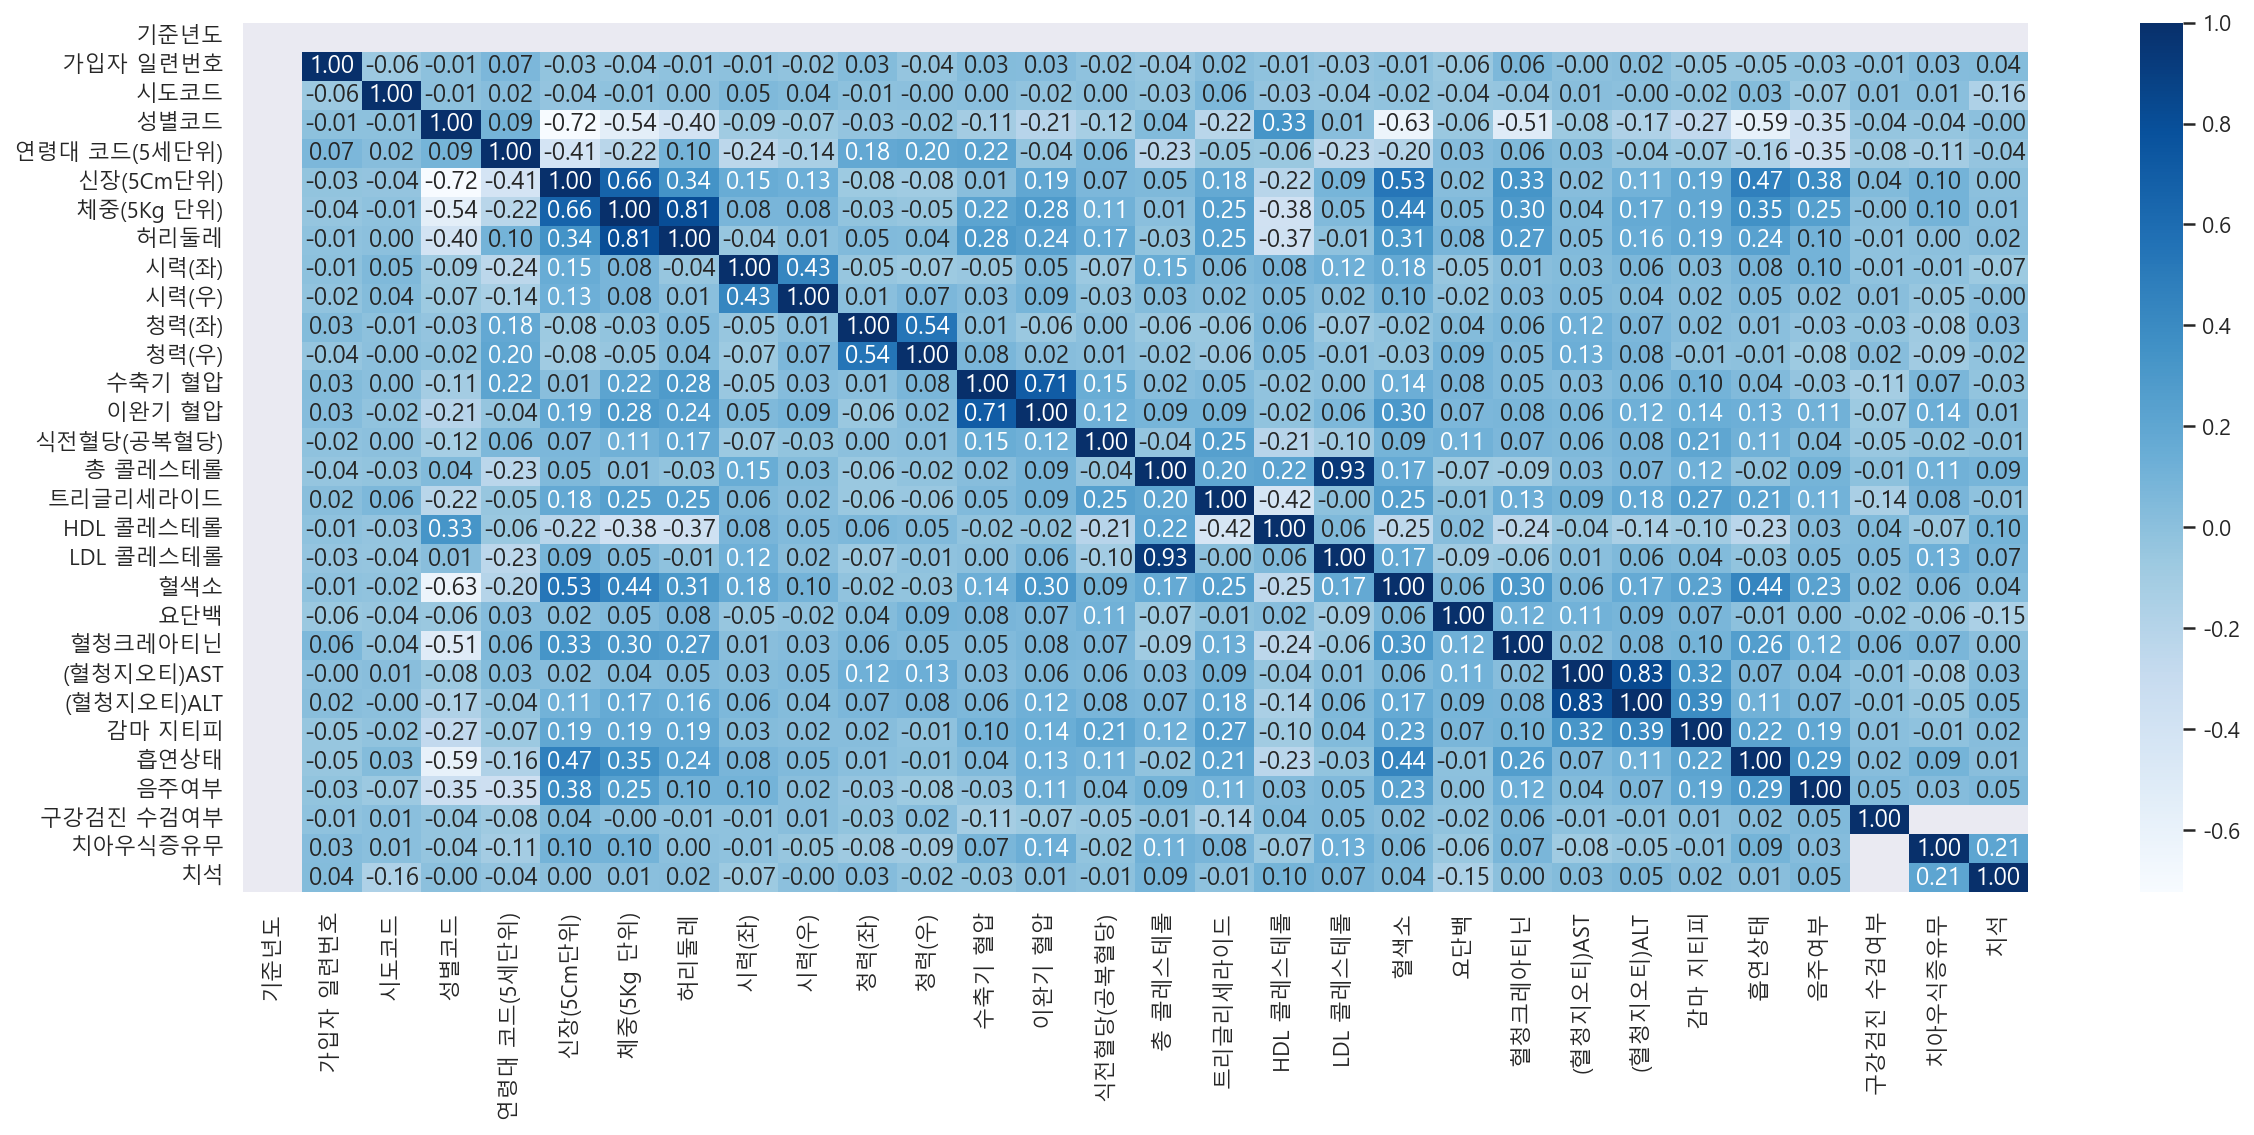

In [164]:
# 위에서 구한 상관계수를 heatmap을 통해 표현해 봅니다.
plt.figure(figsize=(20,8))
# annot = 숫자 표시, fmt= 소숫점, cmap = 특정 색
sns.heatmap(df_corr,annot=True, fmt=".2f", cmap="Blues")

C:\Users\wlsgh\AppData\Local\Temp/ipykernel_7844/2618587488.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask= np.triu(np.ones_like(df_corr, dtype=np.bool))


<AxesSubplot:>

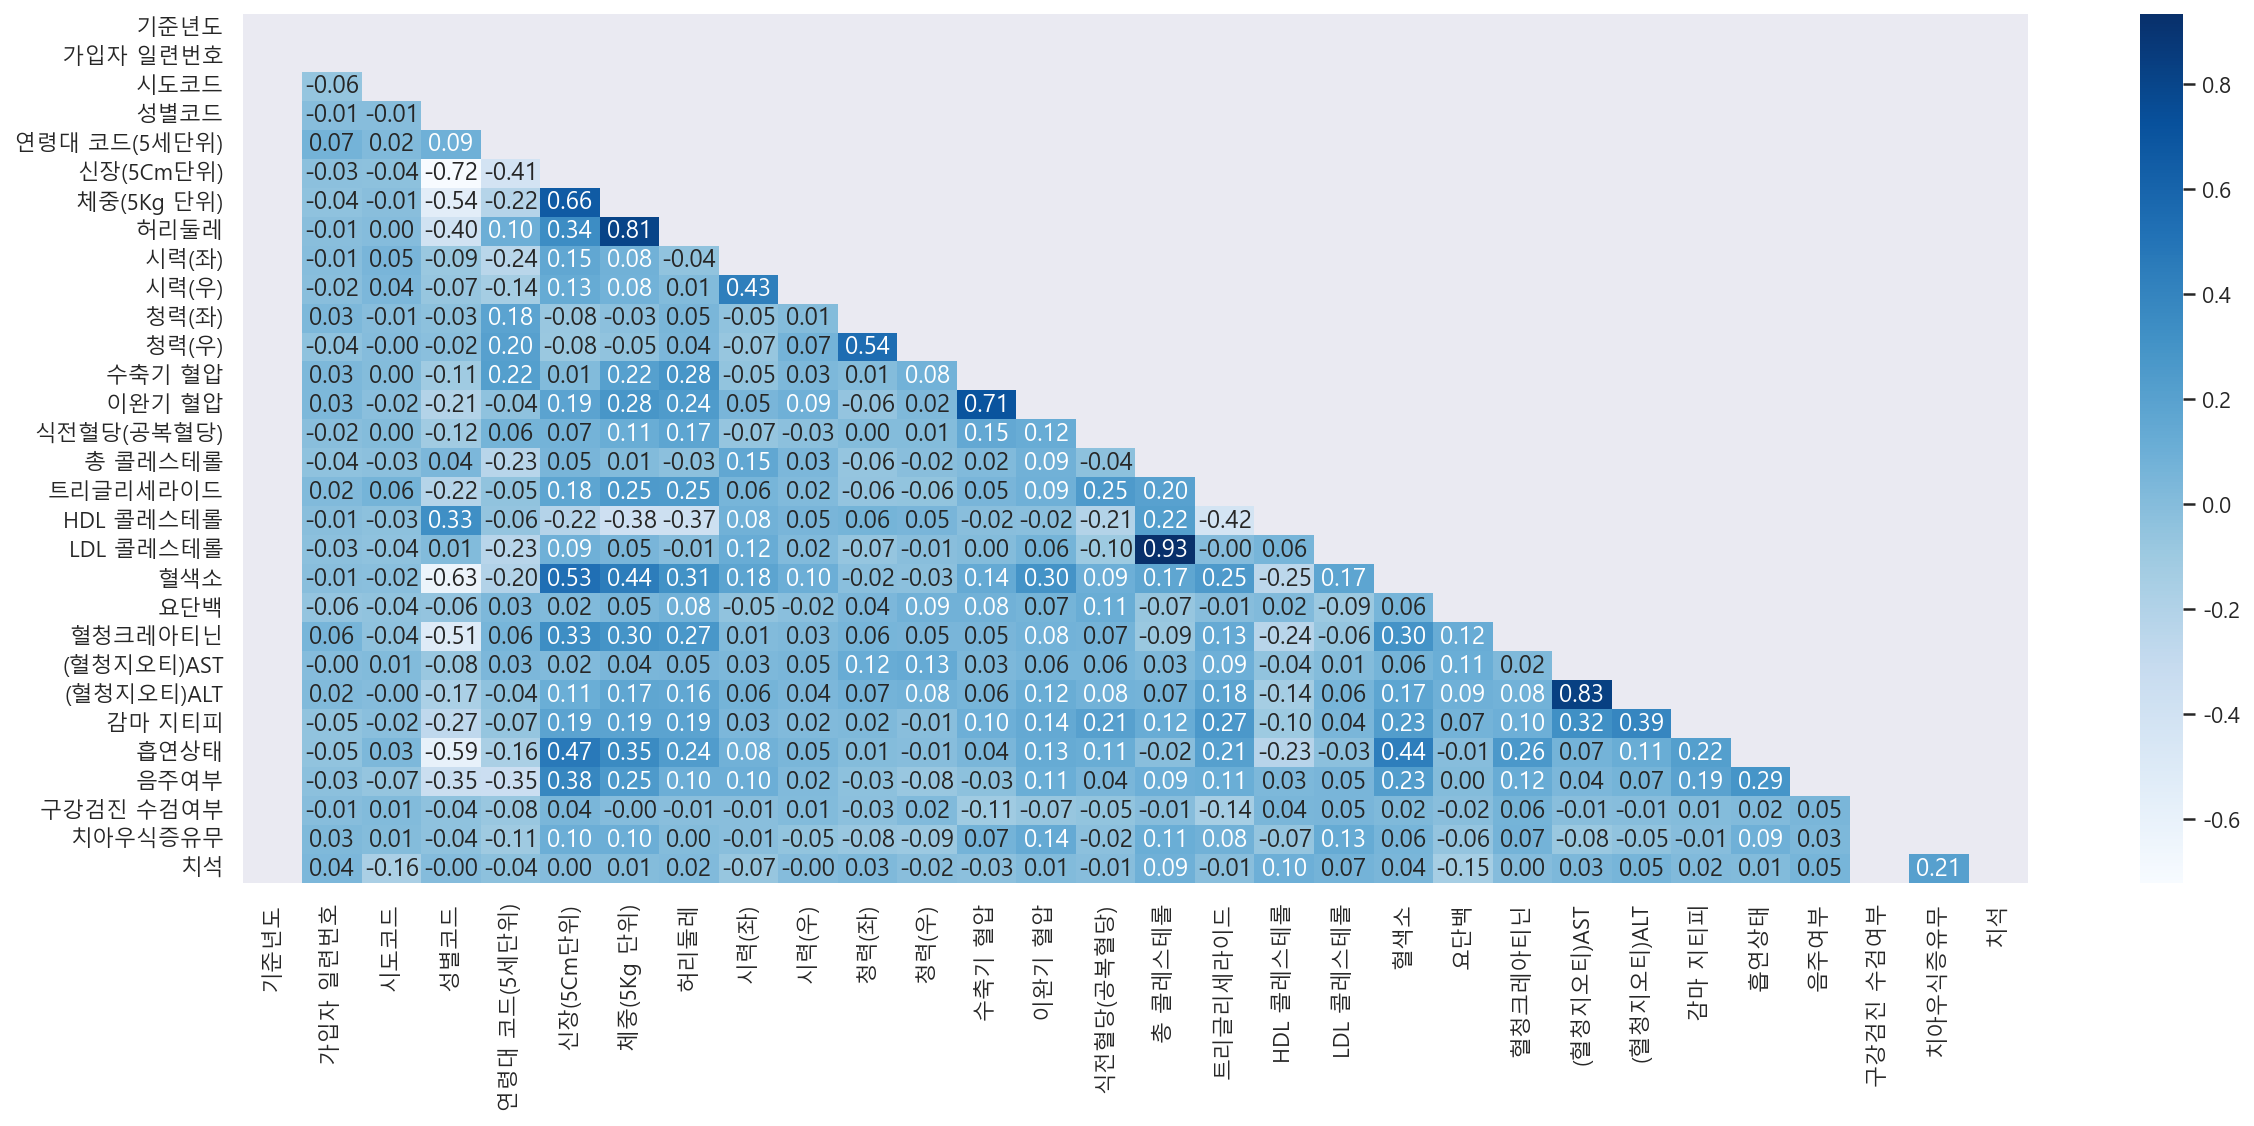

In [169]:
mask= np.triu(np.ones_like(df_corr, dtype=np.bool))

# mask를 사용해서 대각선 아래의 값만 표시
# vmax = 색의 농도 기준
# 위에서 구한 상관계수를 heatmap을 통해 표현해 봅니다.
plt.figure(figsize=(20,8))
# annot = 숫자 표시, fmt= 소숫점, cmap = 특정 색
sns.heatmap(df_corr,annot=True, fmt=".2f", cmap="Blues", mask=mask)